In [1]:
import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
import cv2

# Load the images

In [2]:
features = {}

In [3]:
import os
import numpy as np
from skimage import io, transform, filters
from skimage.morphology import disk
from skimage import color

def load_images(image_folder, target_size=None):
    images = []
    labels = []

    for filename in os.listdir(image_folder):
        print(f"Processing: {filename}")
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the image
            img = io.imread(os.path.join(image_folder, filename), as_gray=False)

            print(f'Original shape: {img.shape}')

            # Compute mean color per channel
            mean_color = img.mean(axis=(0, 1))
            print(f"Mean color (RGB): {mean_color}")

            # Define a threshold for background detection (adjustable)
            threshold = 85 

            # Create a mask where pixels close to mean color are set to black
            mask = np.linalg.norm(img - mean_color, axis=-1) < threshold
            img[mask] = [0, 0, 0]  # Convert background to black

            # Convert to grayscale
            gray_img = color.rgb2gray(img)

            if gray_img.shape[1] > gray_img.shape[0]:  # Width > Height
                gray_img = np.rot90(gray_img)  # Rotate 90 degrees to make it portrait
                
            # Get original dimensions
            if target_size is not None:
                original_height, original_width = gray_img.shape
                aspect_ratio = original_width / original_height
                print(f'Aspect ratio: {aspect_ratio}')

                # Compute new dimensions to preserve aspect ratio
                target_width, target_height = target_size
                if aspect_ratio > 1:  # Landscape
                    new_width = target_width
                    new_height = int(target_width / aspect_ratio)
                else:  # Portrait or square
                    new_height = target_height
                    new_width = int(target_height * aspect_ratio)

                # Resize the image
                img_resized = cv2.resize(gray_img, (new_width, new_height), interpolation=cv2.INTER_AREA)
                #print(img_resized.shape)
            else:
                img_resized = gray_img

            # Apply a median filter
            img_filtered = filters.rank.median(img_resized, disk(5))

            # Append processed image and label
            images.append(img_filtered)
            labels.append(filename.split('_')[0])

    # Return the final arrays
    return np.array(images), np.array(labels)


# Load images into dataset
image_folder = 'images/train'

images, labels = load_images(image_folder)

Processing: arandela_1.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [110.1628578 165.0827712  65.9388379]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_10.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [110.70044687 155.77994124  39.71008682]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_11.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [115.25852066 164.08960448  15.44796848]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_12.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [109.06696139 169.29511123  65.4132079 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_13.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [102.98972162 164.22379059  61.92348565]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_14.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [105.40330262 166.49884775  63.57124954]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_15.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [107.06594435 166.52390756  64.77303134]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_16.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [108.74632231 168.97990651  66.54081557]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_17.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [118.03312588 171.05390867  64.34162108]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_18.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.85392539 167.45929135  58.84194427]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_19.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [105.96510177 164.08528921  61.49909009]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_2.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [109.09268962 166.76348517  63.40551768]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_20.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.09975624 161.61730618  74.82690292]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_21.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [110.37250084 169.69713402  63.62065241]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_22.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [108.12987423 166.44391696  58.30550194]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_23.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [ 99.73720678 154.28060171  54.16210122]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_24.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [116.29145114 167.62995317  60.85822031]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_25.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [108.84336959 158.60919359  45.48749977]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_3.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [106.23807918 158.1556903   49.76343875]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_4.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [104.24958377 155.63265249  47.22772588]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_5.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [107.85019408 157.93013901  46.63575427]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_6.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [106.88647662 158.27678755  44.71768188]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_7.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [104.53488117 155.6628277   47.43702687]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_8.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [109.8178002  159.72259204  47.48431142]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: arandela_9.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [111.49393527 156.49245442  40.65328746]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_1.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [131.51244619 181.84490119  83.199703  ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_10.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [137.63118765 186.0098594   89.59421698]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_11.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [134.48227935 183.87580734  87.20709642]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_12.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [140.46142515 180.9563659   63.74529139]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_13.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [139.47119798 181.91273064  65.66405879]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_14.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [135.59420702 177.81814533  62.75975969]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_15.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [136.16928408 177.89579497  50.30929173]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_16.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [140.66455131 181.95712068  66.3967975 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_17.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [127.80463537 176.69725312  81.02111499]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_18.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [139.50560792 180.19549783  65.26647472]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_19.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [144.15756173 184.89225017  70.61879645]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_2.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [125.80114227 174.95741558  79.58627224]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_20.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [143.40302806 184.08775944  69.08157836]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_21.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [132.32044591 175.0016861   61.10529094]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_22.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [135.19053173 184.16395696  87.37363413]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_23.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [139.94501485 180.9685617   65.47864395]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_24.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [138.36527994 179.62792089  65.12504906]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_25.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [137.77071264 179.76734172  62.475985  ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_3.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [133.69886695 181.75198131  83.79119089]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_4.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [141.3454149  182.38017686  67.22922675]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_5.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [135.47750431 178.10502677  64.87410863]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_6.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [129.35159016 173.02189255  61.53187784]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_7.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [132.14760335 174.82641972  60.766055  ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_8.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [132.0491883  181.62256092  84.40205044]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: clavo_9.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [132.31407632 180.92967839  85.73387517]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_1.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [138.86968602 178.45887015  50.98843066]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_10.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.83379269 174.20405441  68.66622893]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_11.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.35480584 171.22720464  67.13333225]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_12.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [140.42271603 181.2700296   54.61971241]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_13.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.33882088 176.04302491  70.81210942]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_14.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [125.44758511 178.21986092  75.35848151]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_15.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [122.30822108 176.03180991  72.61140527]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_16.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [126.83562342 179.02068541  76.9010654 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_17.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.42182393 175.4784584   71.39633412]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_18.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [121.65446578 174.80830977  70.66307407]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_19.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [124.99259143 177.40769185  73.02239747]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_2.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [137.30431885 181.66088867  60.10783068]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_20.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [141.90361023 181.55916839  53.10235945]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_21.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [122.13992596 162.87680552  38.67879687]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_22.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [118.50910081 174.2999346   70.27864774]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_23.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [126.63003964 178.18321175  74.3656808 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_24.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [119.91099739 174.06166522  69.52609539]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_25.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.0760426  175.57807382  68.71792052]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_3.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [134.88753054 177.35085053  47.17816247]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_4.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [136.77598296 178.56156805  49.05221738]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_5.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [134.35828982 176.88849258  48.44466612]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_6.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [126.55366919 172.54390017  47.45870537]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_7.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [128.21976725 174.6414991   48.79708523]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_8.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.47197405 171.40452364  69.58938376]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tornillo_9.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [121.04991754 174.72918786  70.1087194 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_1.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [144.29398092 185.19633855  55.11992921]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_10.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [131.76215469 174.52767478  49.7055467 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_11.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [127.27443737 171.01427778  46.13322364]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_12.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [121.21401342 167.32406139  43.74615076]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_13.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [122.66145706 172.33126428  48.7771882 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_14.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [129.35283682 173.6759011   50.0880234 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_15.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [122.59271812 172.95894898  51.87833701]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_16.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [123.22234249 172.55862512  50.6307958 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_17.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [118.48303848 167.74162388  48.70891539]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_18.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [119.42435328 174.91380925  70.98086272]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_19.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [123.85997687 177.63648966  72.63408205]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_2.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.57717503 172.99836572  69.21479479]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_20.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [127.53178226 181.89874511  70.57275295]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_21.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [123.61286238 177.92068725  72.91046672]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_22.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [108.45871629 166.2953719   60.17415301]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_23.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [121.52032344 177.67659039  67.94222154]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_24.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [139.42980523 180.508676    53.39910041]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_25.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [127.21199311 175.68081707  44.35908763]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_3.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [119.55949879 174.99317053  70.33555497]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_4.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [114.10477098 175.78124629  61.86671766]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_5.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [120.98331918 180.49018606  65.64073382]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_6.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [133.0165525  175.51521577  48.97003057]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_7.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [117.03803974 161.96000248  44.40634738]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_8.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [125.05179278 167.78943793  47.4710456 ]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


Processing: tuerca_9.jpg
Original shape: (2304, 4096, 3)
Mean color (RGB): [123.25733121 169.11378765  45.33890957]


C:\Users\coraz\AppData\Local\Temp\ipykernel_12896\3979379397.py:71: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  images, labels = load_images(image_folder)


In [4]:
save_folder = "images/grayscale"
os.makedirs(save_folder, exist_ok=True)  # Create folder if it doesn't exist

for i, (im, label) in enumerate(zip(images, labels)):
    fig, ax = plt.subplots(figsize=(5, 5))  # Create figure with single axis
    ax.imshow(im, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')  # Hide axes
    #plt.show()
    # Save the plot
    save_path = os.path.join(save_folder, f"{label}_{i}.jpg")
    fig.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close(fig)  # Close figure to free memory

print("Images saved successfully!")

Images saved successfully!


# Thresholding

c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_1.jpg is a low contrast image
  return func(*args, **kwargs)
c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_2.jpg is a low contrast image
  return func(*args, **kwargs)
c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_3.jpg is a low contrast image
  return func(*args, **kwargs)
c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_12.jpg is a low contrast image
  return func(*args, **kwargs)
c:\Users\coraz\Desktop\Proyecto Final IA 1\Codigo\venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: images/black_and_white/li\arandela_

Thresholded images processed and saved successfully!


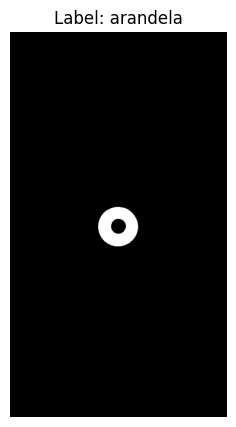

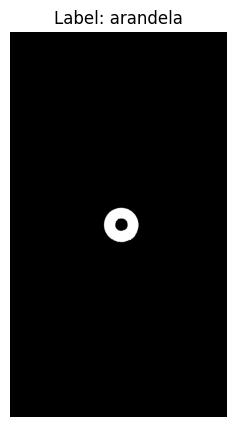

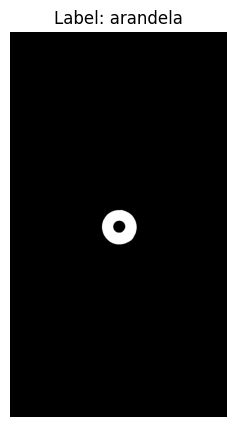

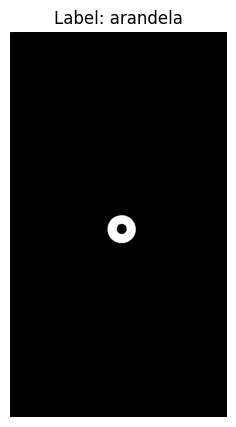

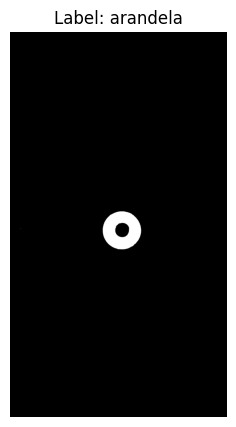

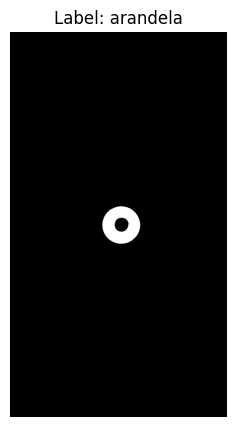

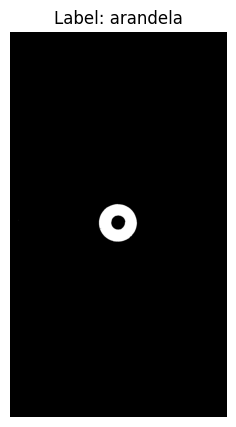

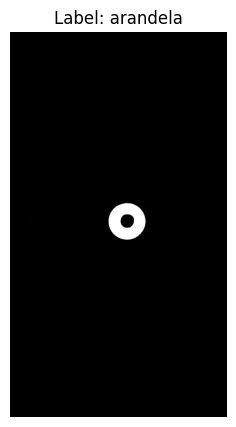

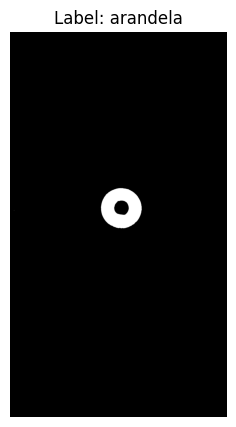

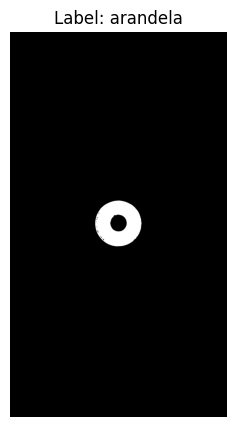

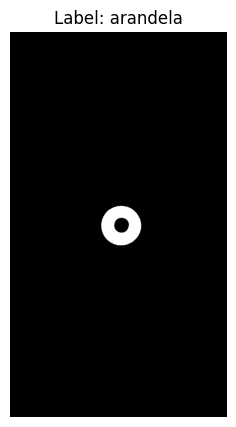

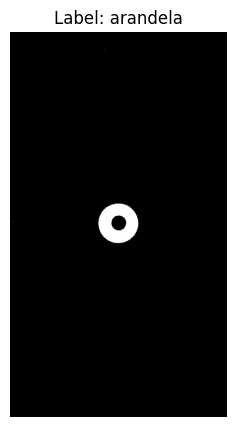

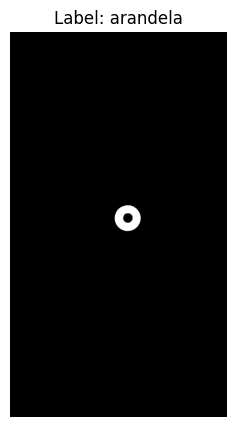

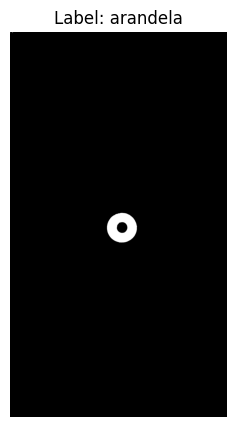

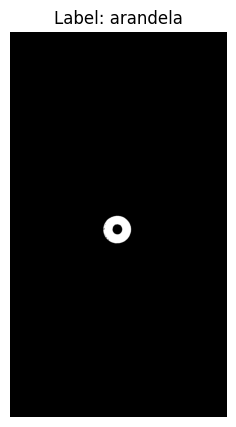

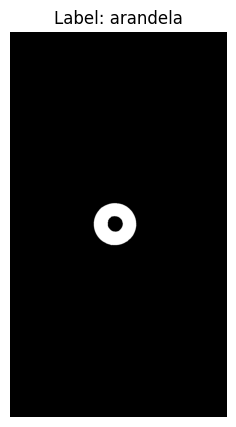

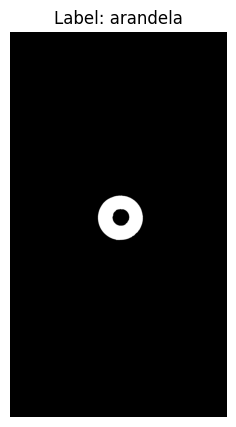

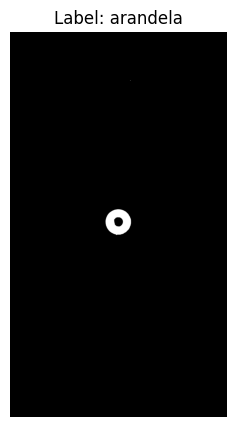

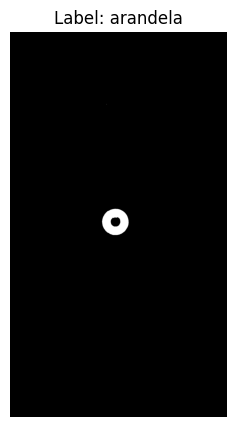

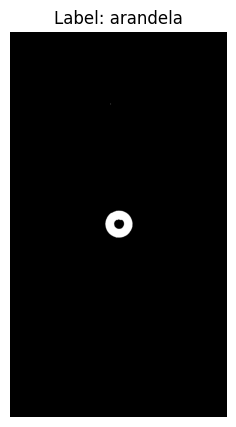

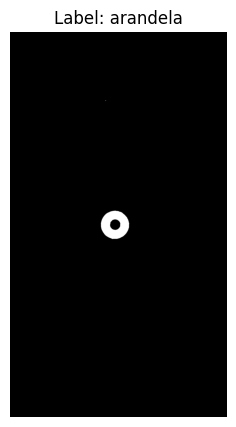

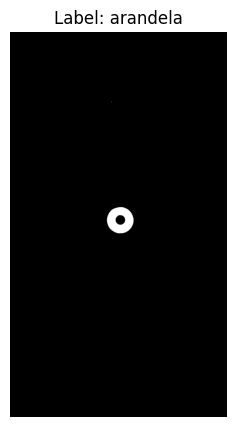

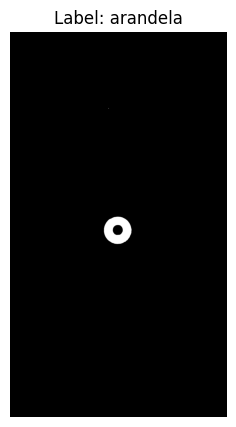

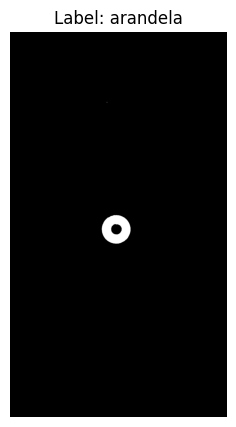

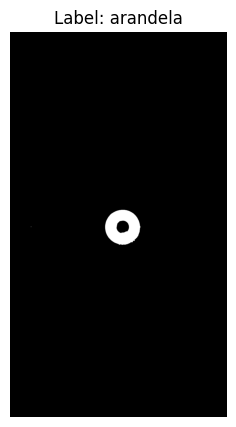

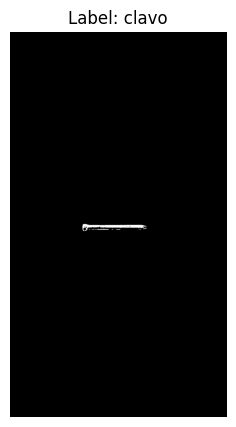

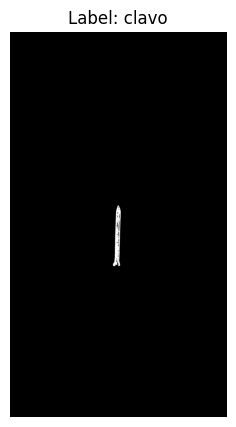

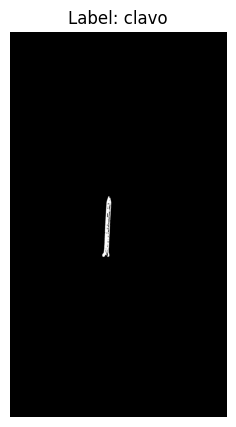

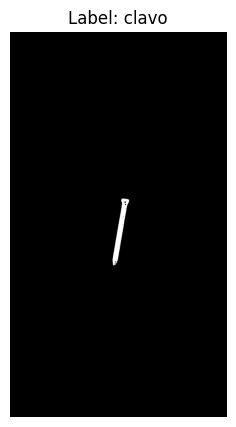

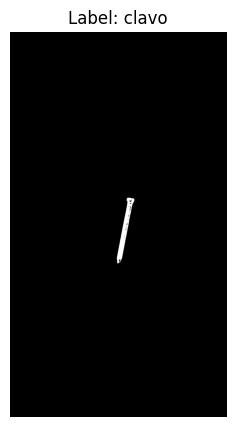

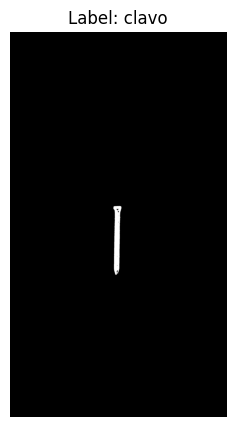

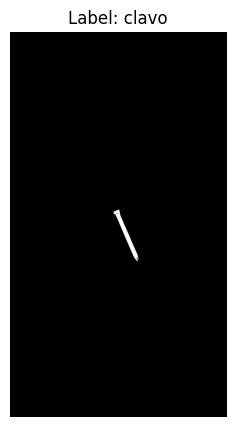

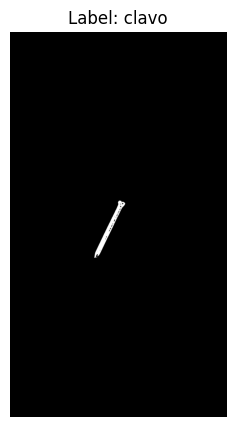

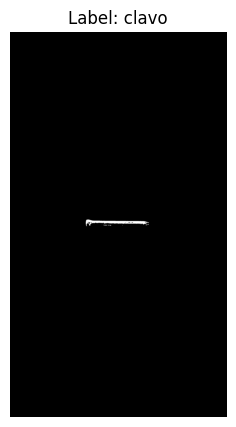

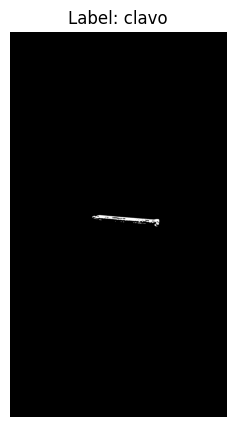

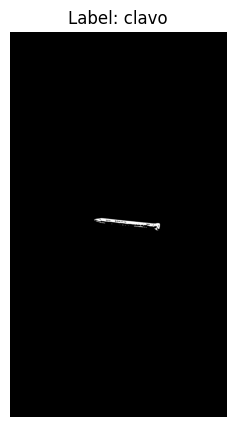

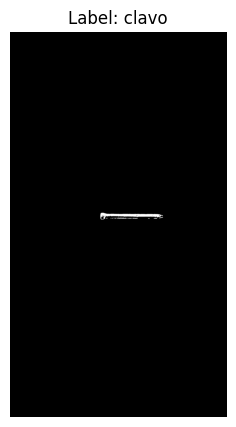

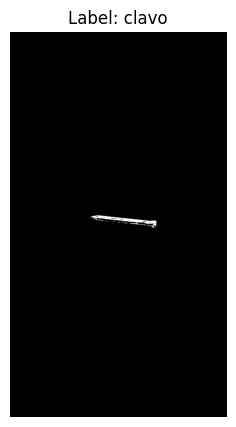

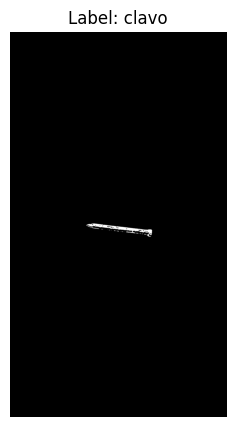

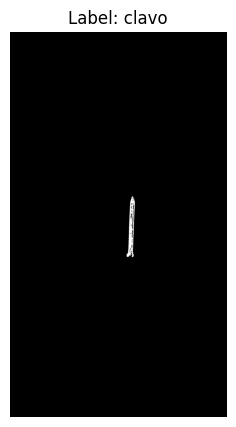

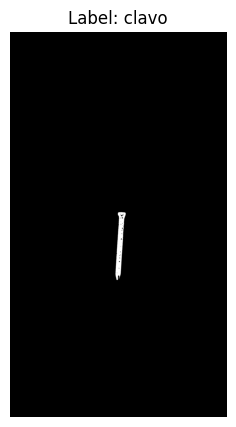

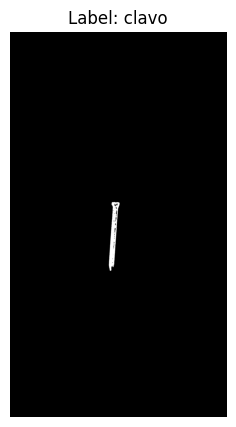

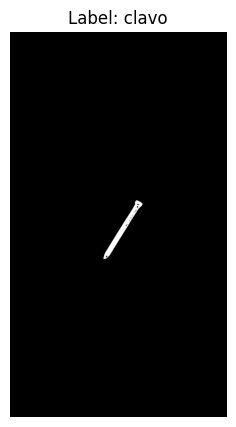

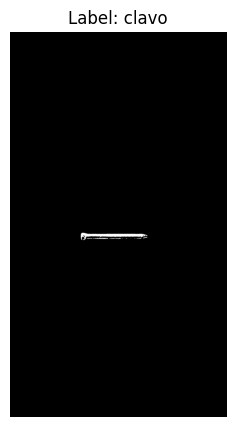

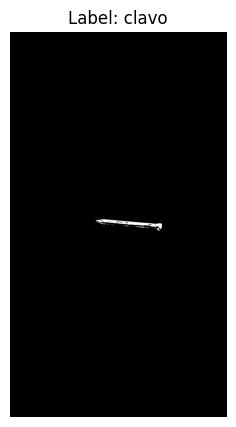

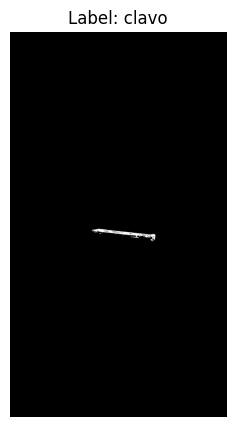

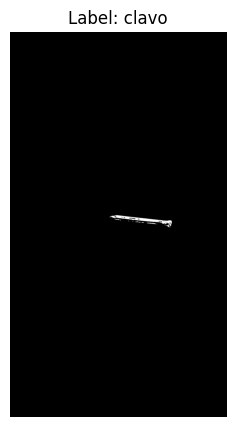

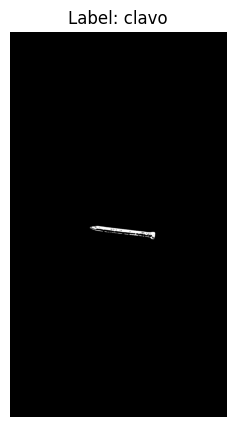

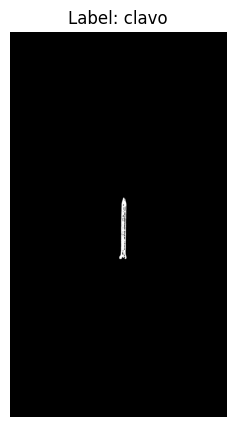

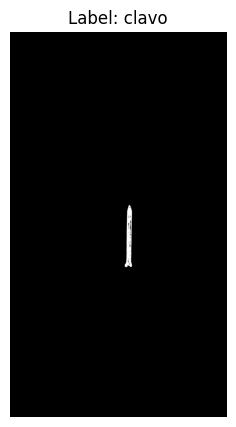

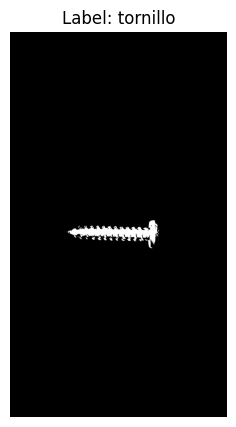

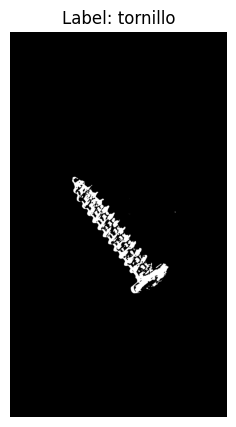

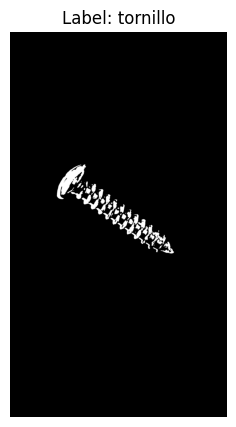

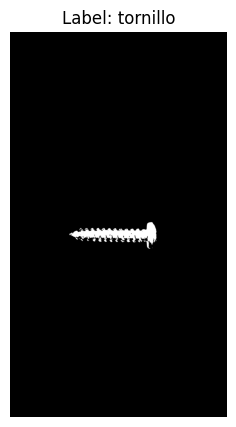

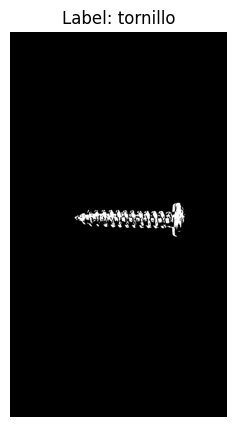

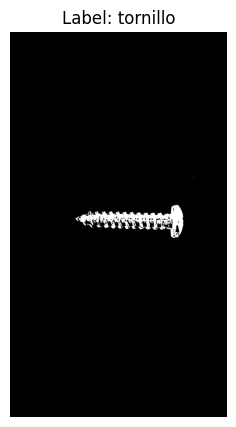

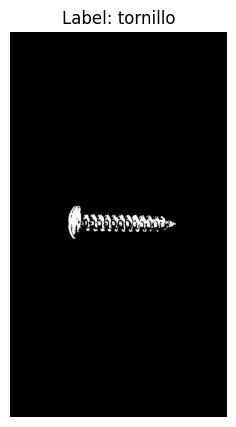

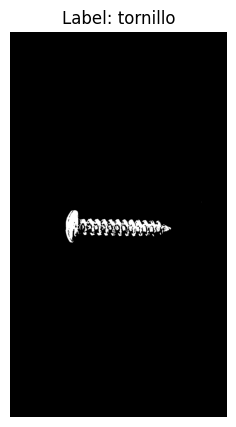

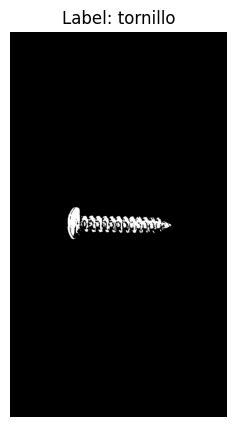

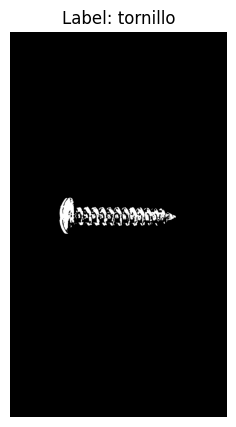

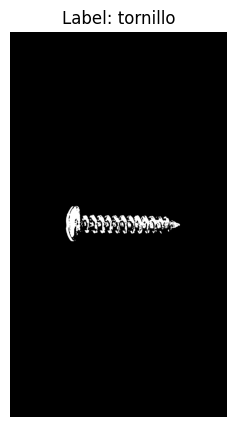

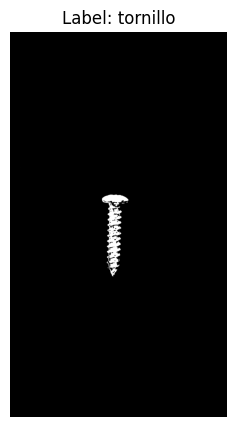

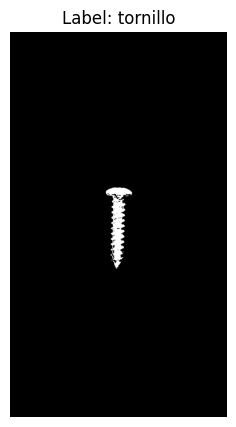

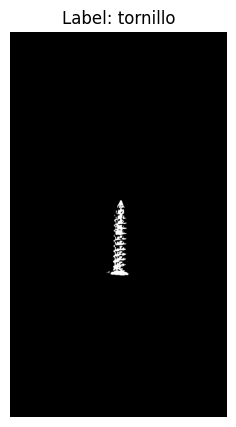

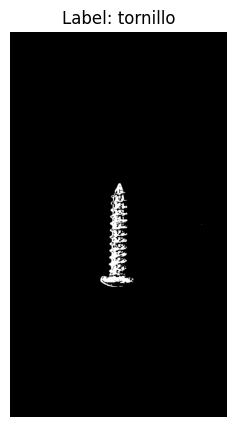

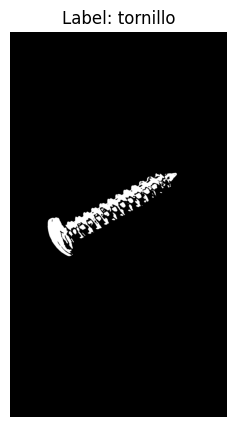

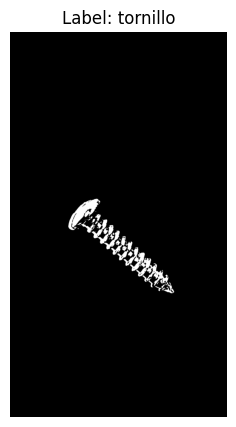

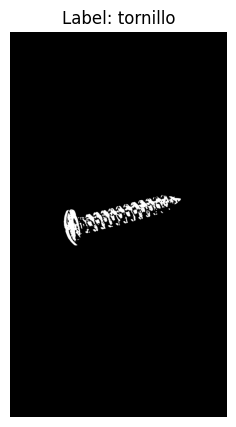

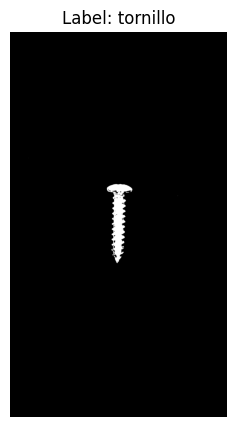

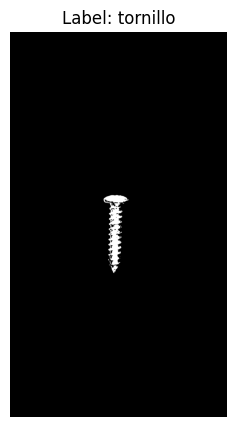

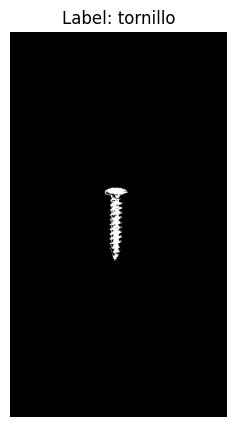

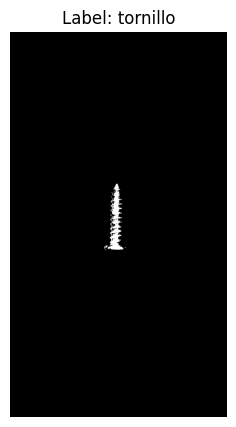

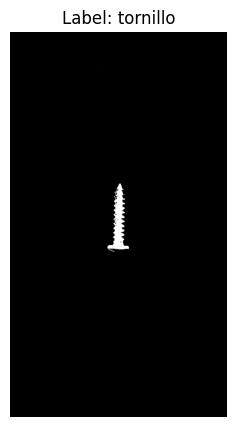

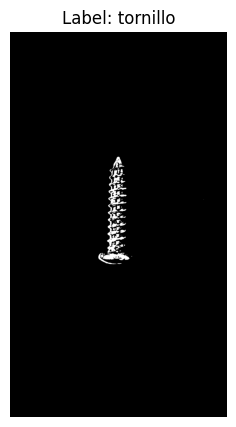

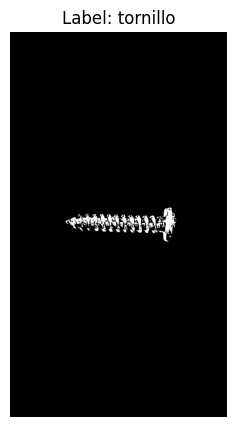

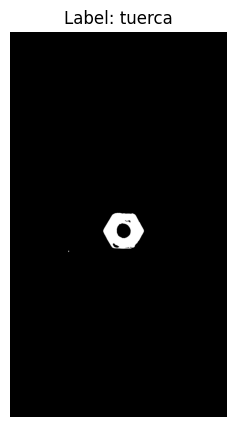

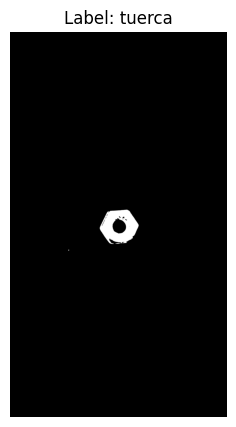

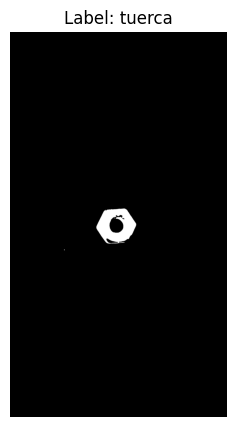

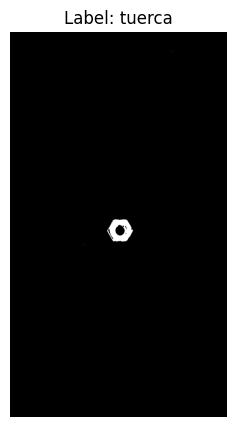

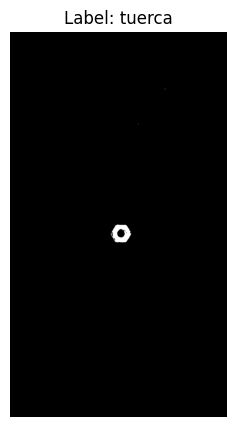

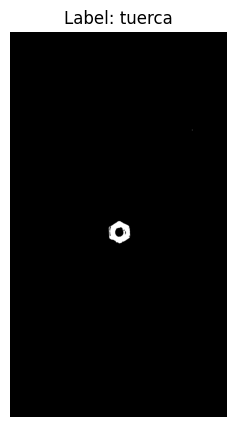

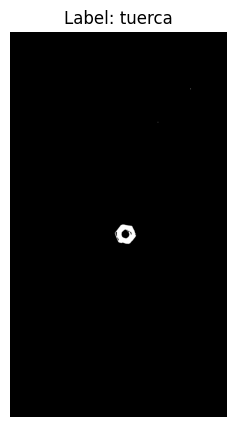

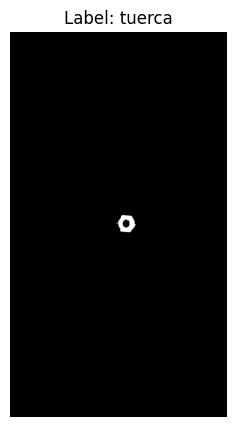

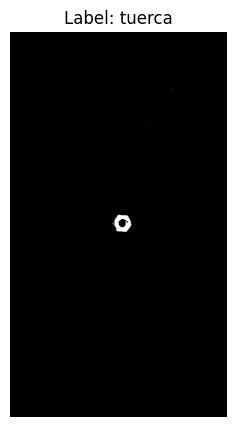

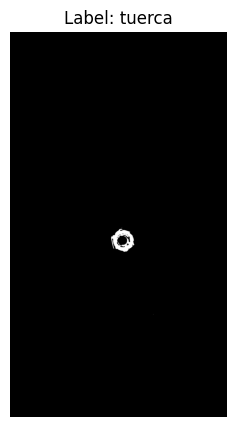

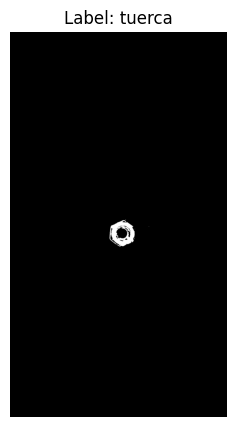

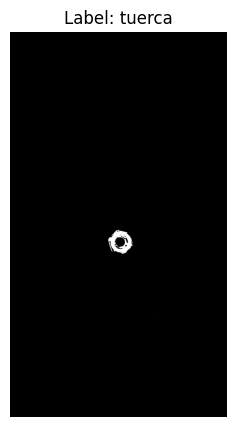

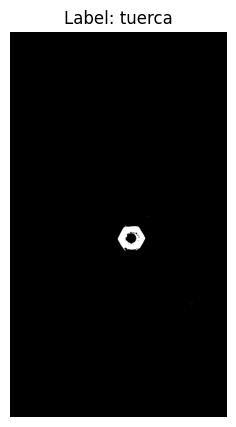

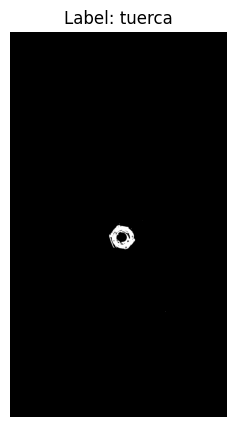

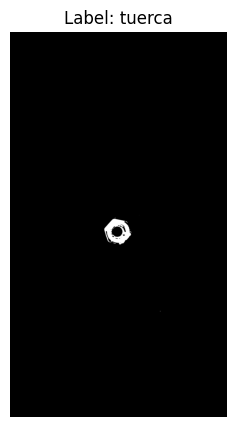

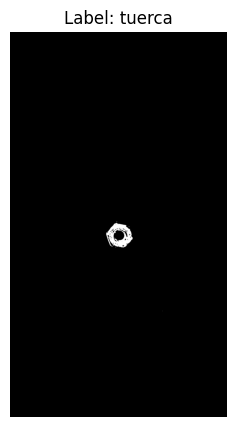

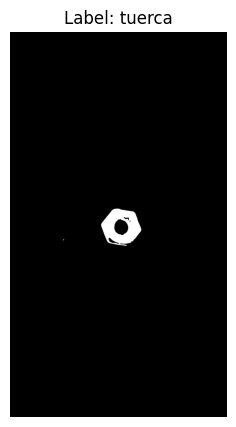

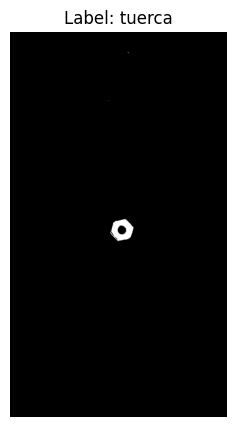

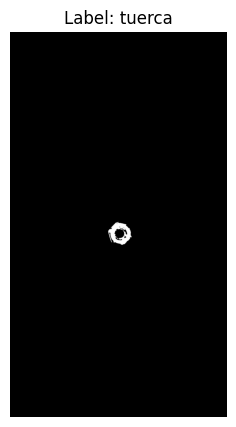

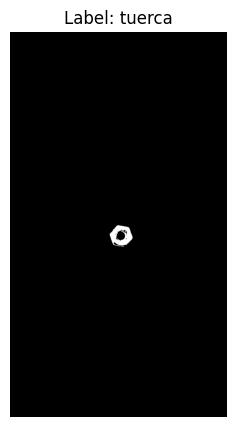

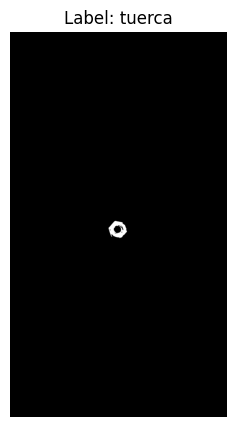

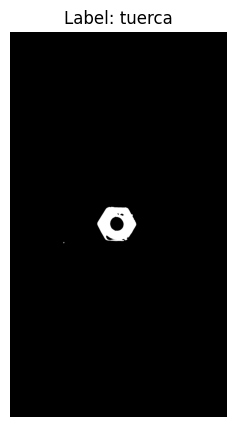

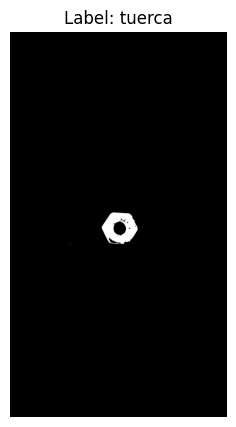

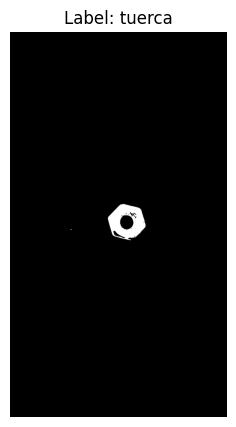

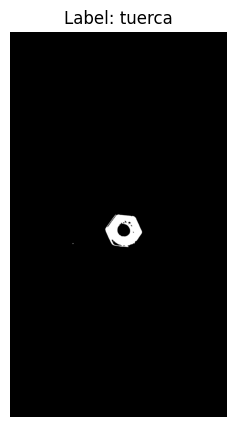

In [5]:
from skimage.filters import threshold_otsu, threshold_li
import os

# Define save folder
save_folder = "images/black_and_white/li"
os.makedirs(save_folder, exist_ok=True)  # Create folder if it doesn't exist

aux_ims = []
for i, (im, label) in enumerate(zip(images, labels)):
    # Apply Otsu's threshold
    local_otsu = threshold_li(im)
    thresh_image = (im >= local_otsu).astype(np.uint8) * 255

    # Invert to obtain black background if needed
    if np.mean(thresh_image) > 127:
        thresh_image = cv2.bitwise_not(thresh_image)
        print(f"Inverting colors for {label}_{i}.jpg")

    aux_ims.append(thresh_image)

    plt.figure(figsize=(5, 5))
    plt.imshow(thresh_image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    # Save the thresholded image
    save_path = os.path.join(save_folder, f"{label}_{i}.jpg")
    io.imsave(save_path, thresh_image)

print("Thresholded images processed and saved successfully!")
images = aux_ims

# Closing Filtering

In [7]:
from skimage.morphology import dilation, closing

def apply_filter(images, filter):
    filtered_images = []
    for image in images:
        filtered = filter(image, disk(10))
        filtered_images.append(filtered)
    return filtered_images

filtered_images = apply_filter(images, closing)

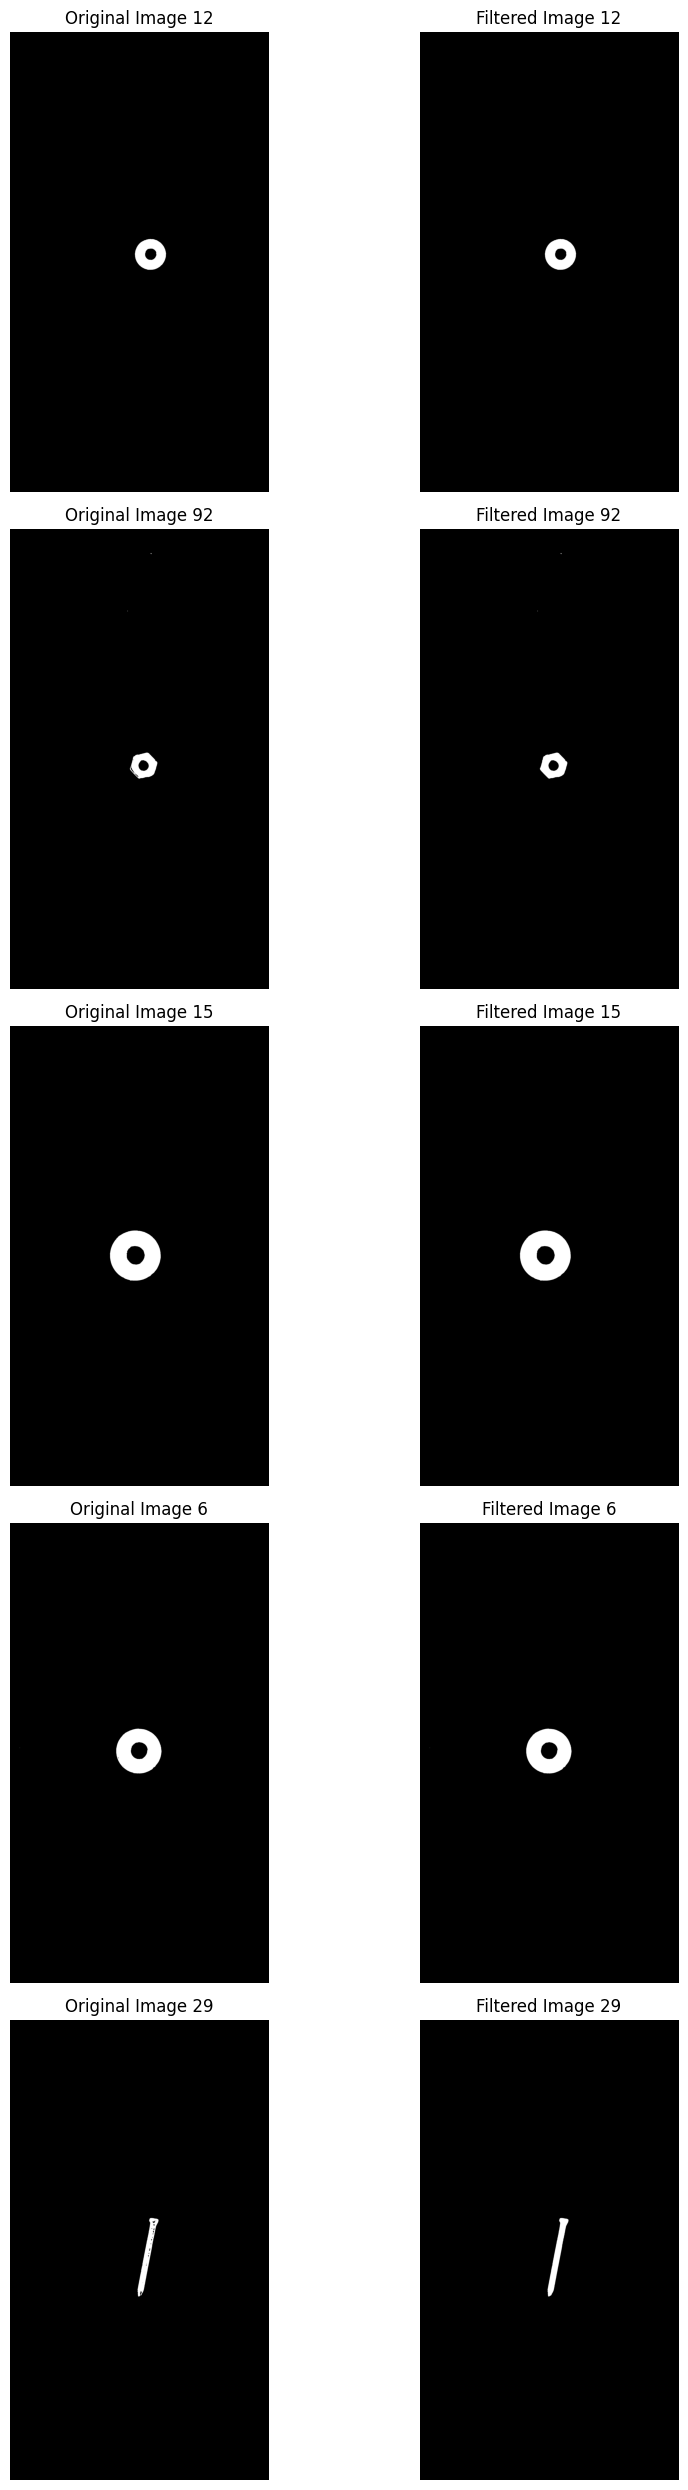

In [8]:
import random  

# Select a few random images to display
num_samples = 5  # Adjust based on how many you want to see
sample_indices = random.sample(range(len(images)), num_samples)

# Plot original and filtered images side by side
fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5 * num_samples))

for i, idx in enumerate(sample_indices):
    axes[i, 0].imshow(images[idx], cmap="gray")
    axes[i, 0].set_title(f"Original Image {idx}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(filtered_images[idx], cmap="gray")
    axes[i, 1].set_title(f"Filtered Image {idx}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

# Find the object's contours

In [9]:
def find_and_filter_contours(image, min_length):
    """
    Finds and filters contours based on a minimum length.

    Parameters:
        image (numpy.ndarray): Binary image.
        min_length (float): Minimum contour length to retain.

    Returns:
        list: Filtered contours.
    """
    if np.mean(image) > 127:  # Invert for white background
        image = cv2.bitwise_not(image)
        print(f"Inverting colors.")
    
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return [cnt for cnt in contours if cv2.arcLength(cnt, closed=True) >= min_length]

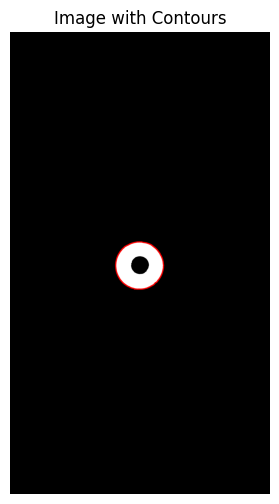

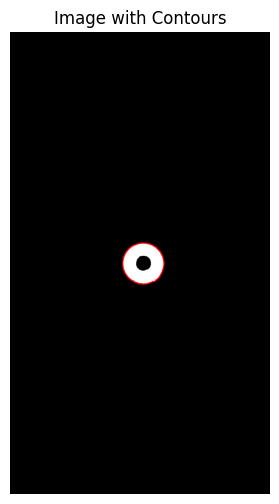

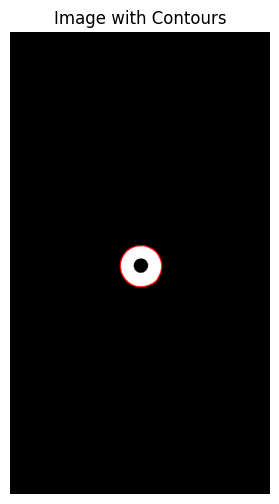

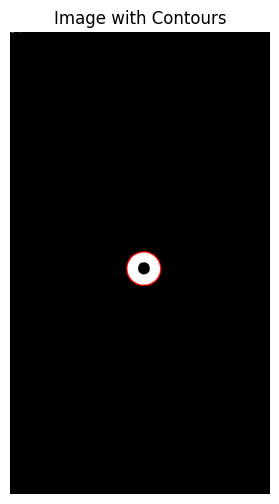

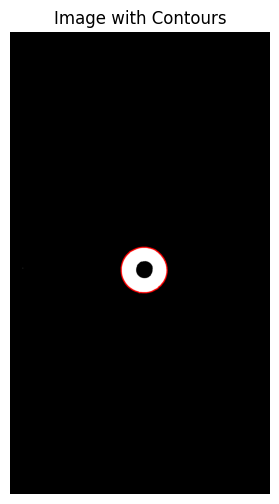

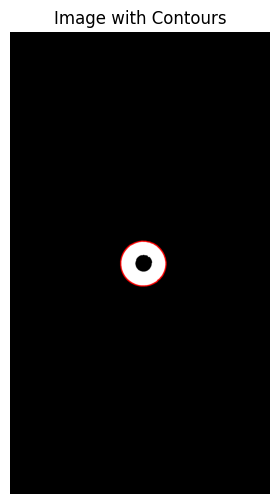

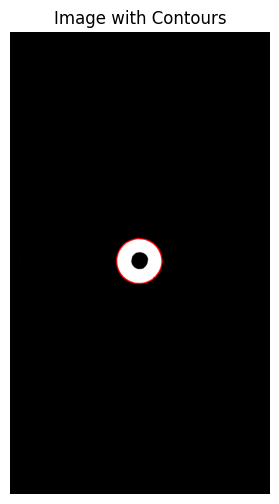

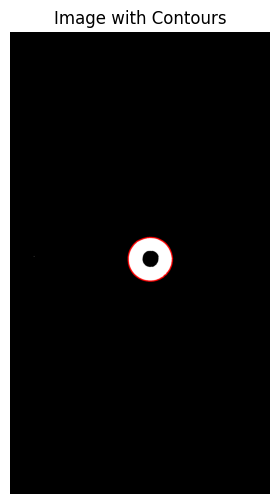

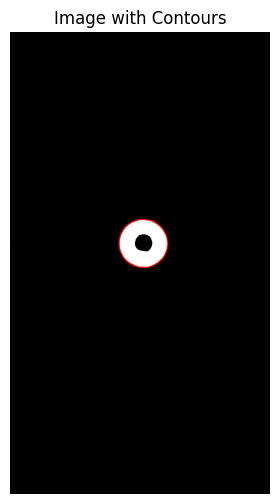

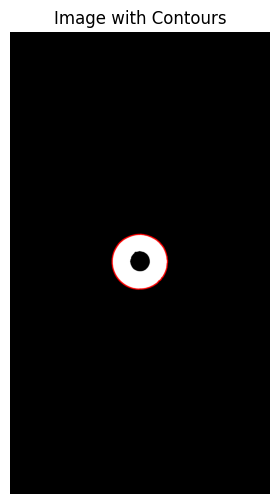

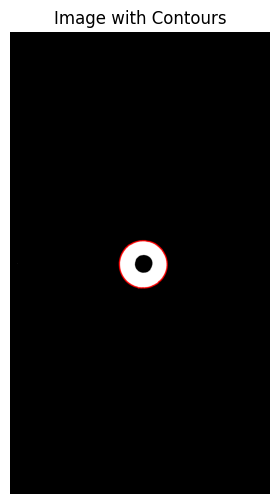

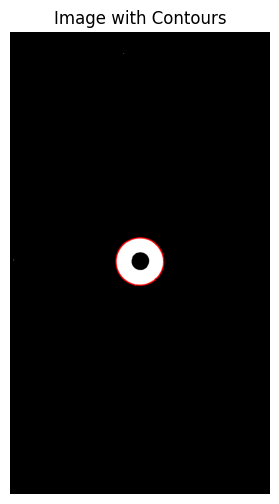

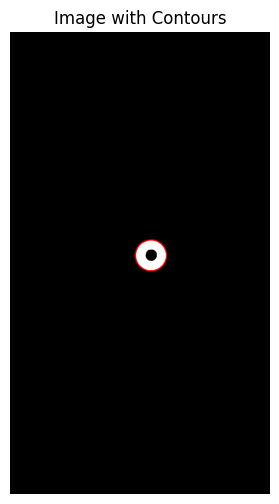

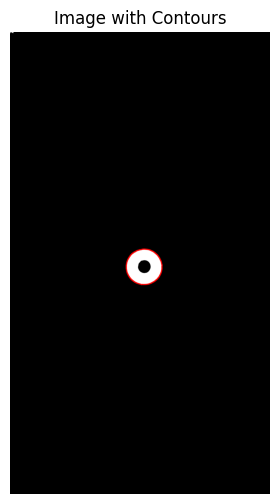

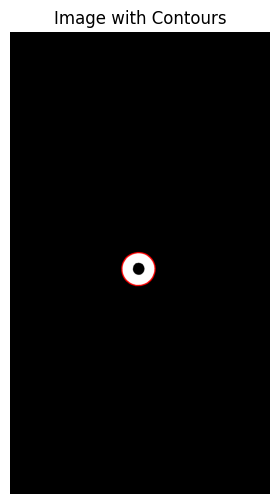

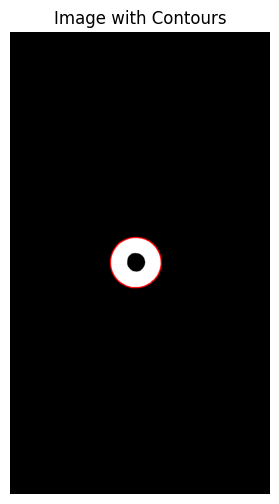

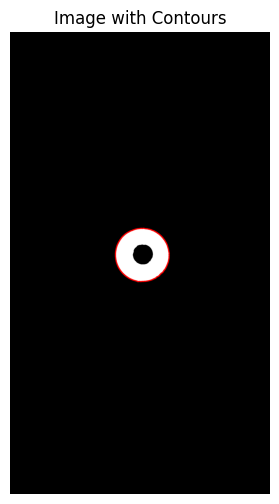

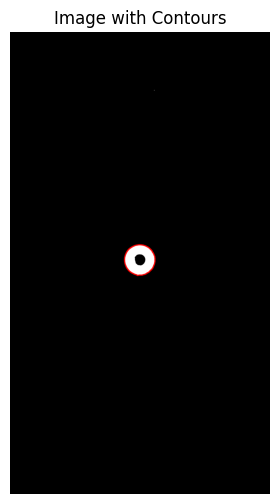

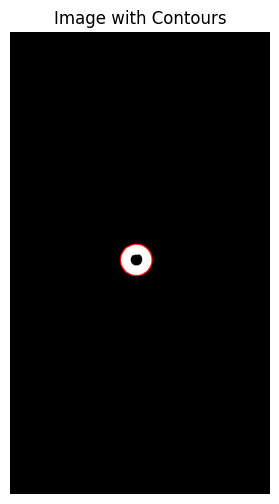

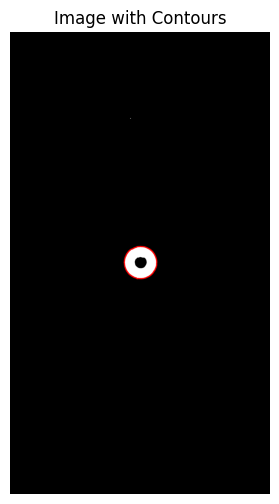

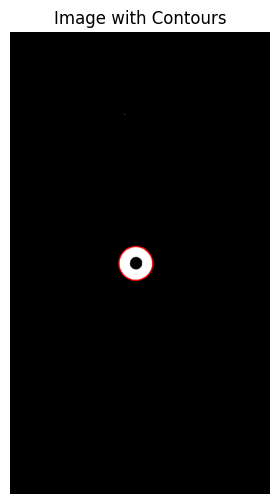

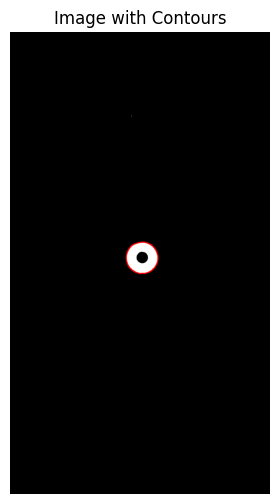

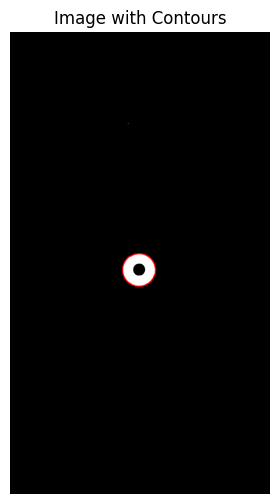

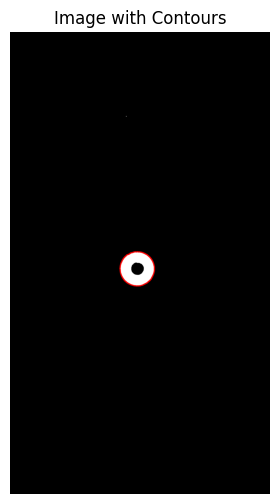

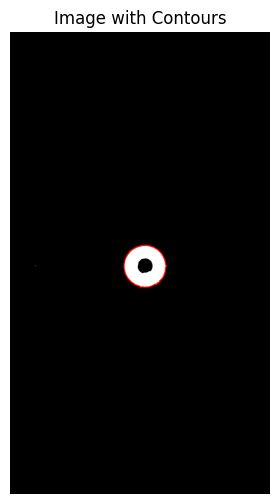

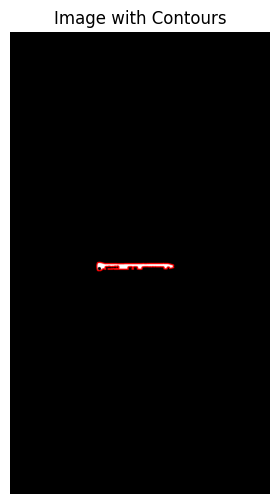

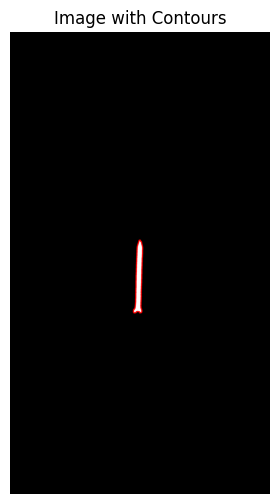

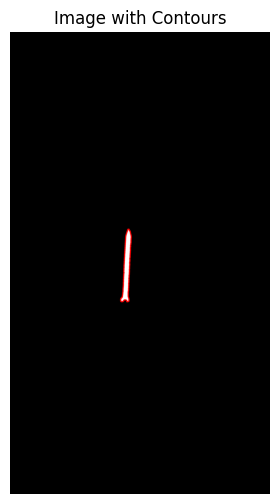

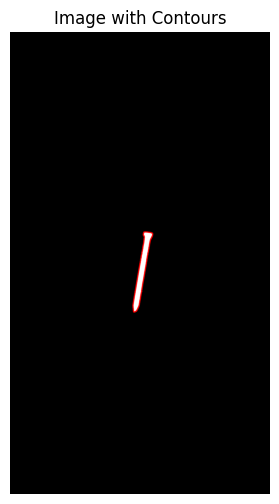

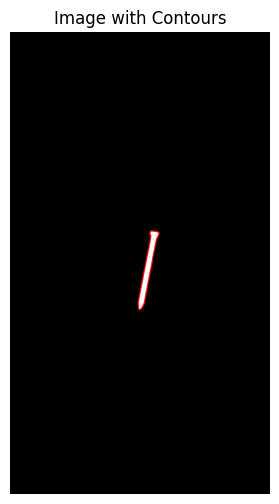

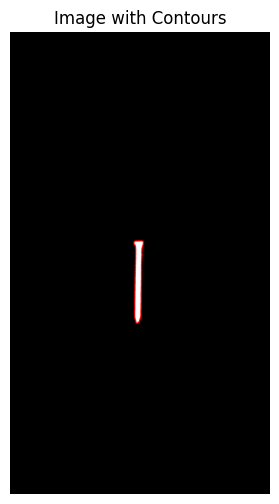

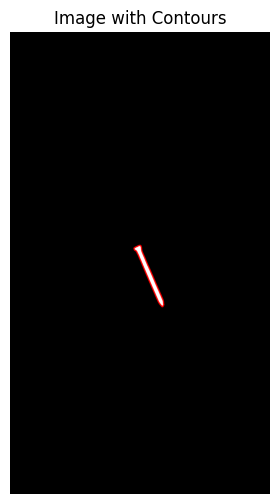

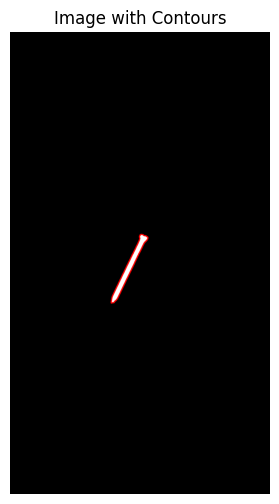

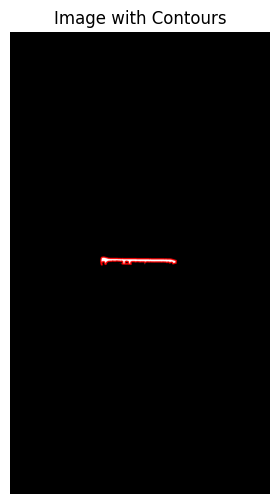

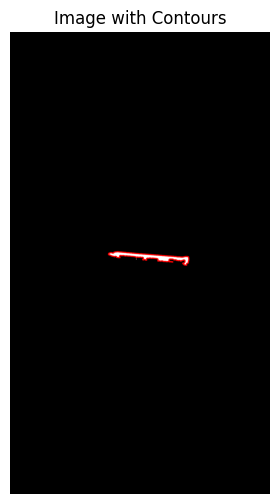

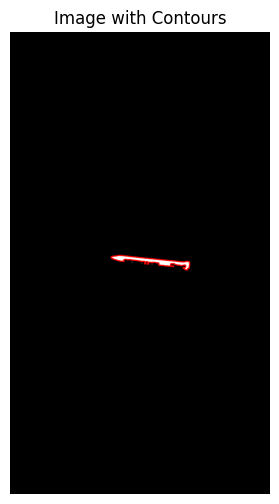

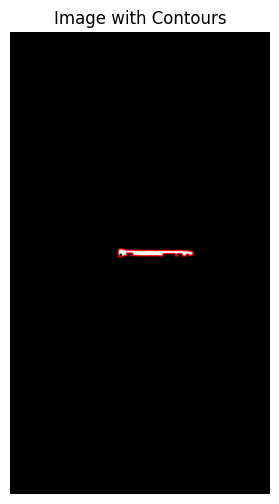

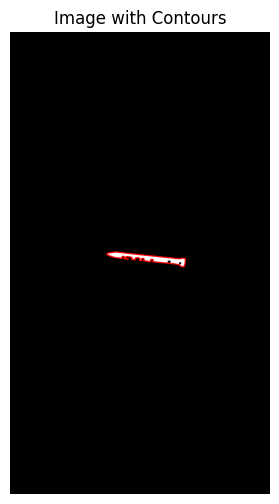

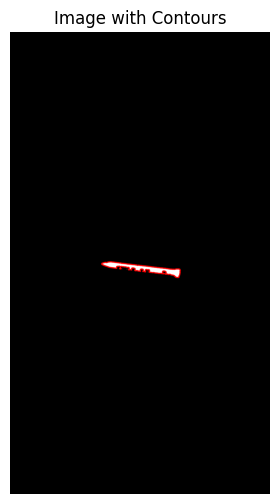

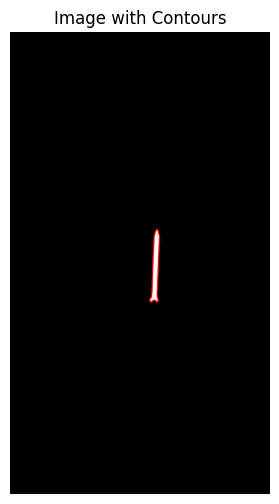

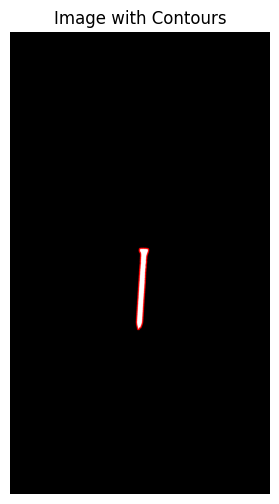

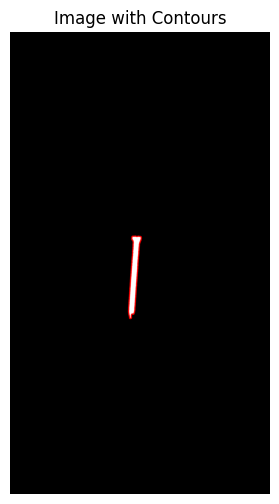

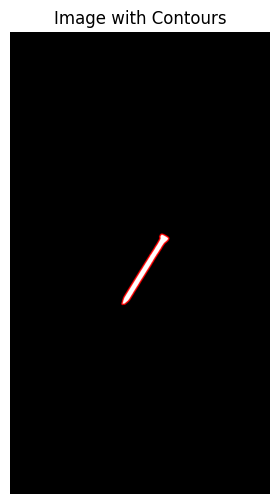

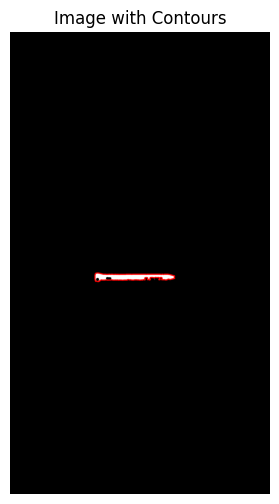

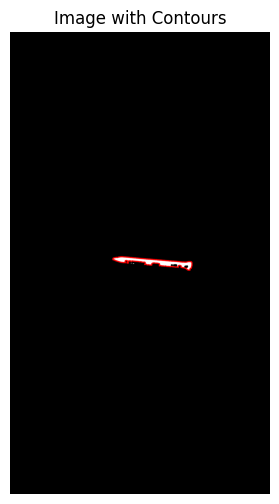

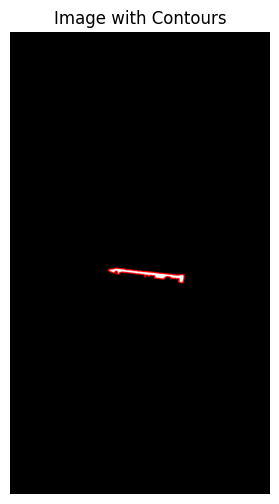

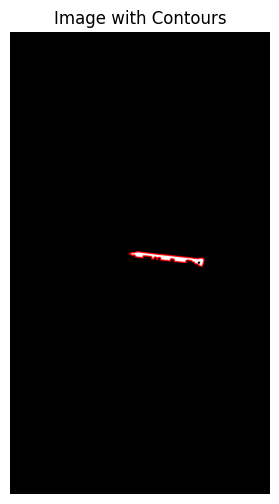

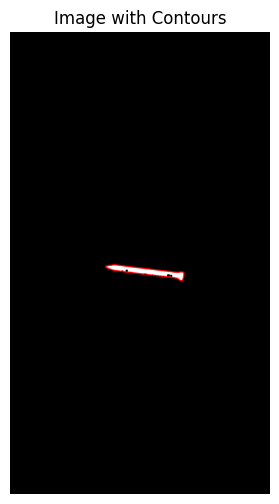

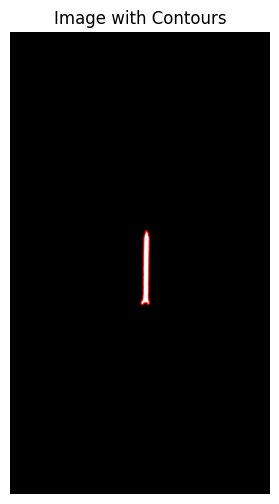

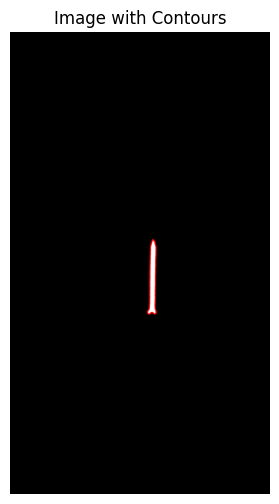

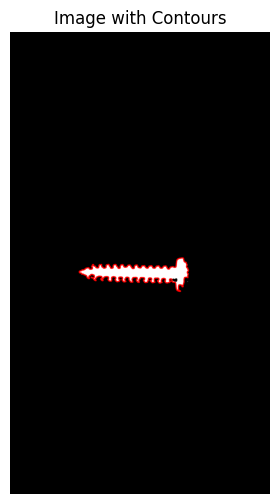

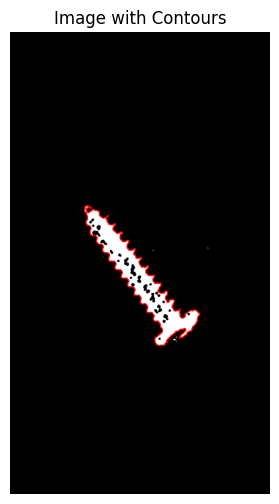

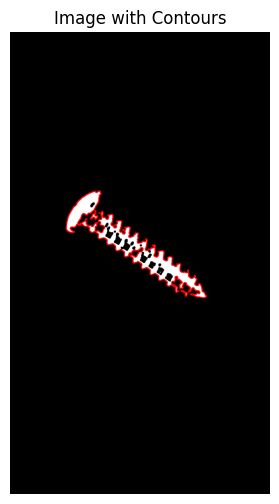

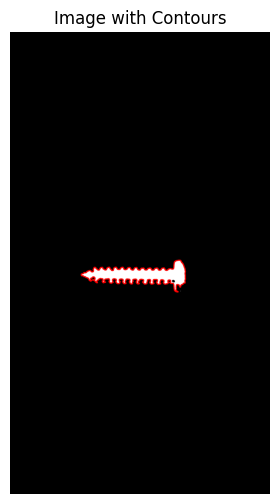

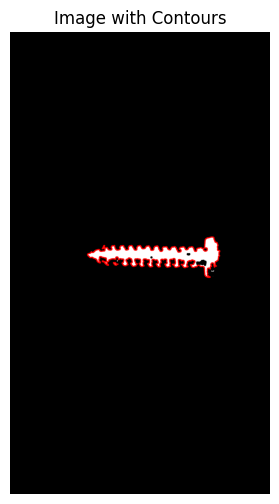

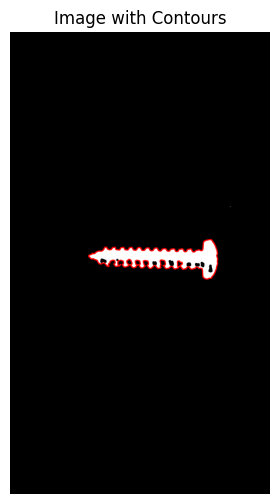

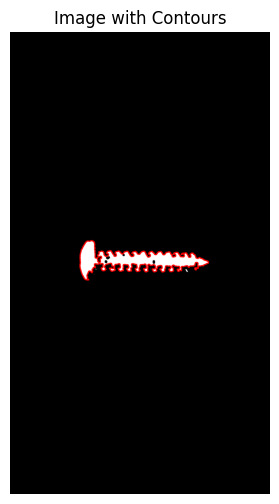

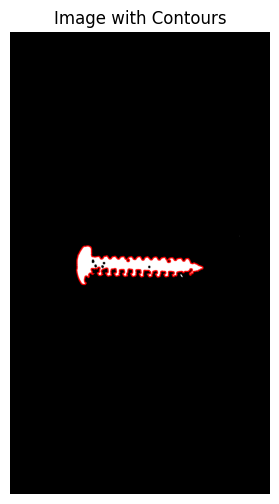

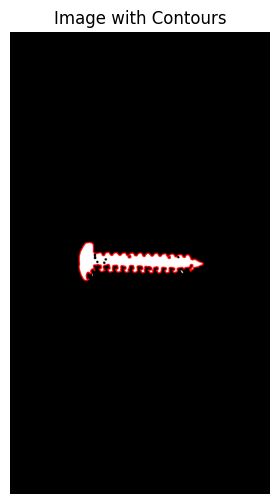

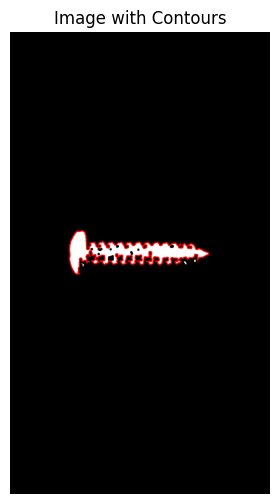

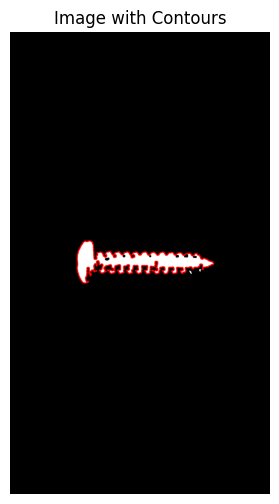

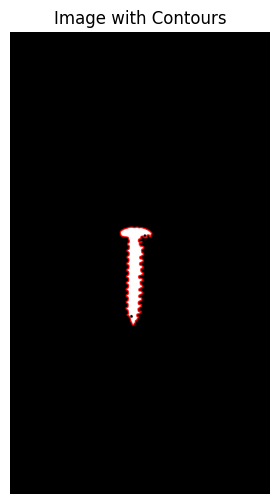

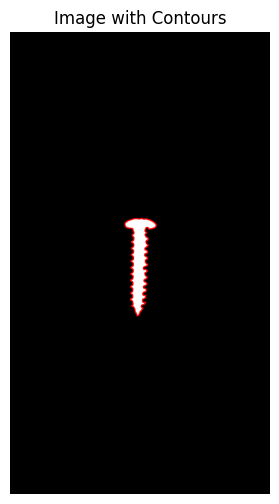

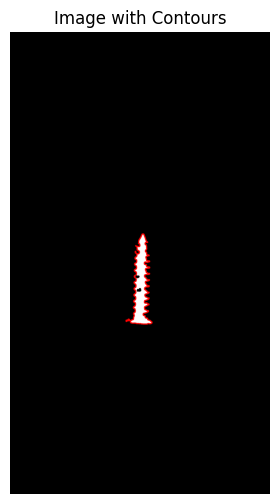

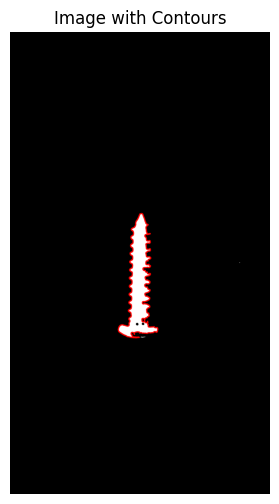

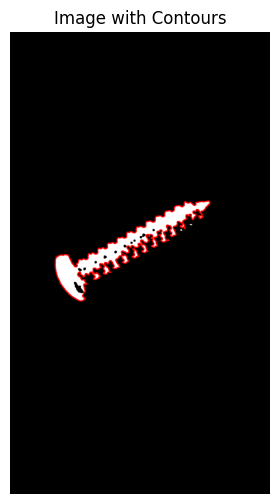

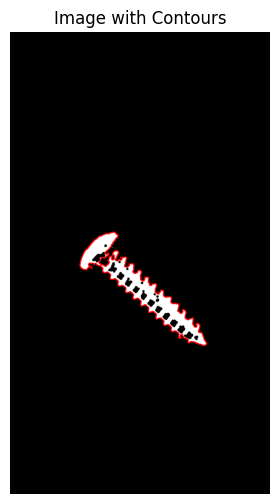

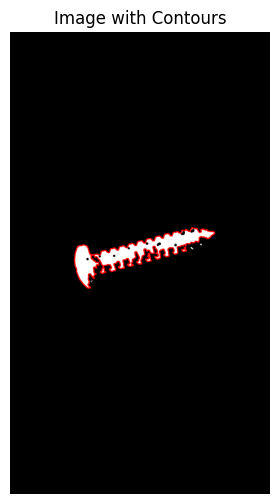

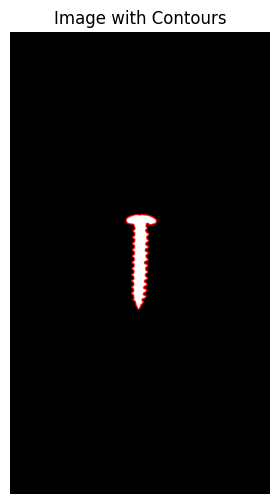

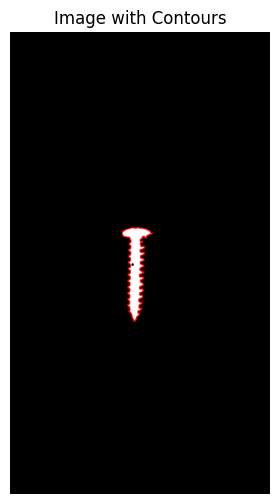

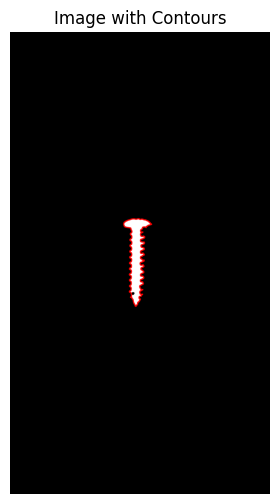

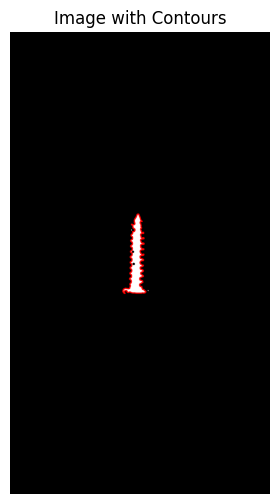

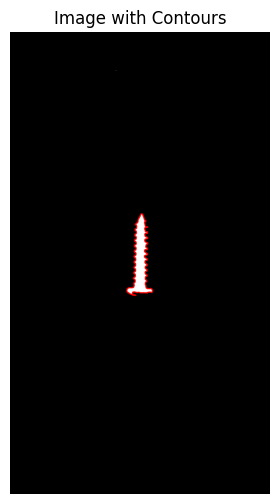

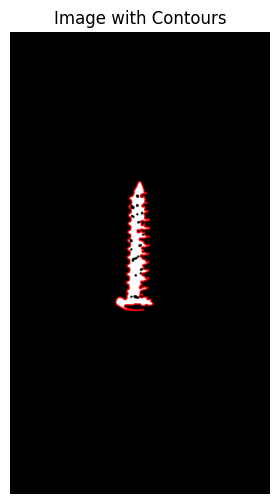

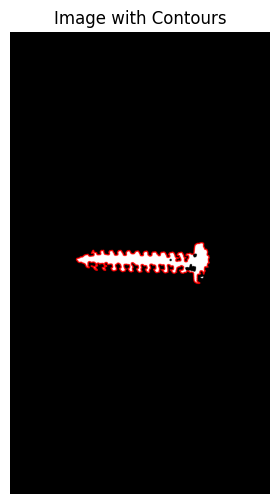

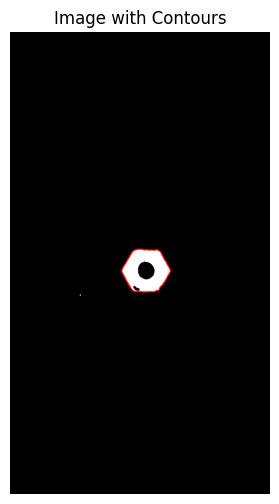

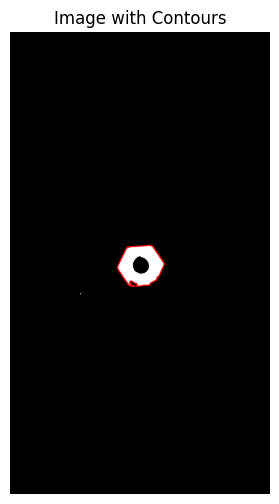

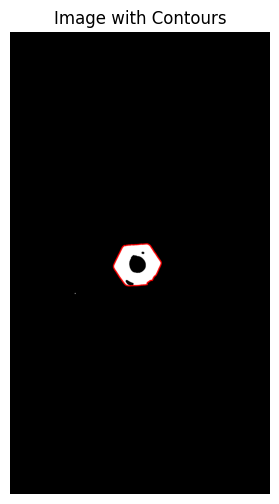

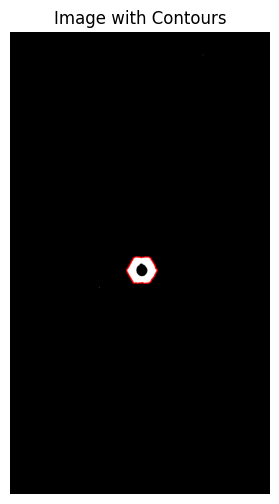

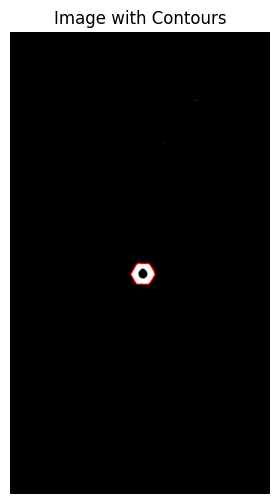

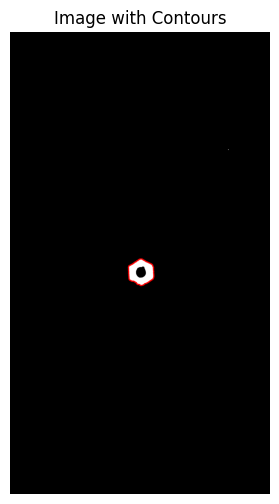

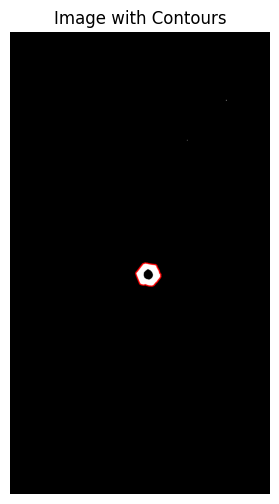

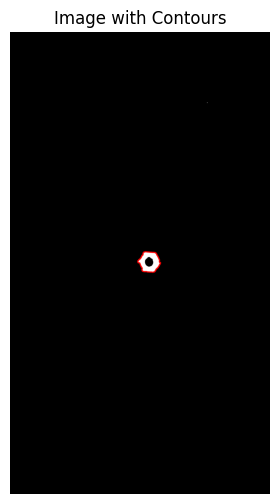

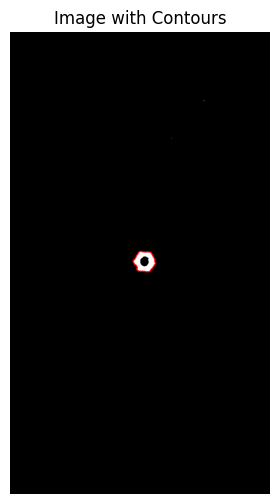

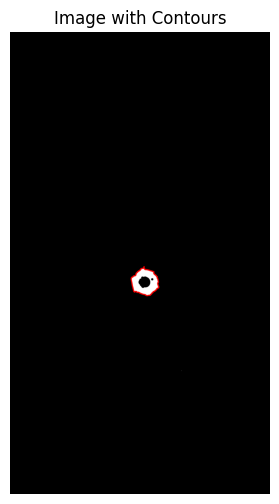

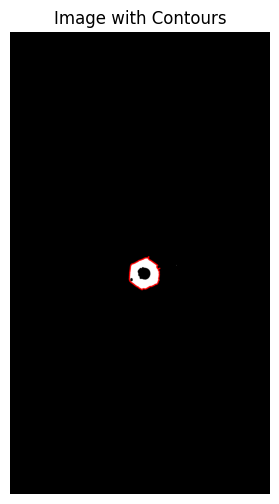

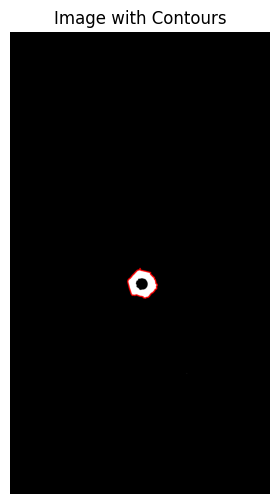

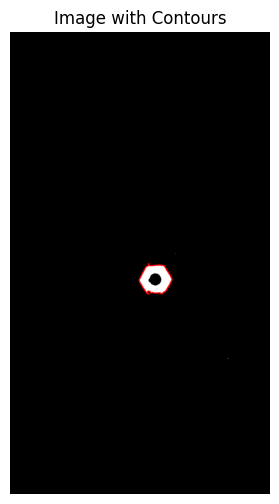

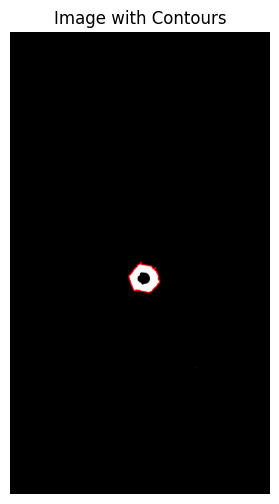

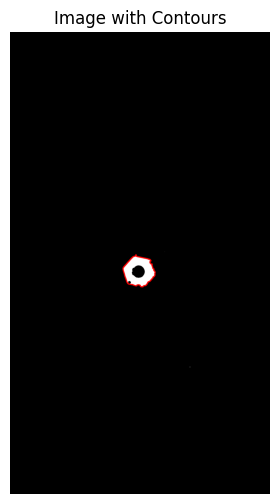

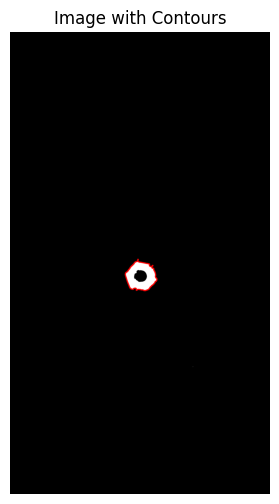

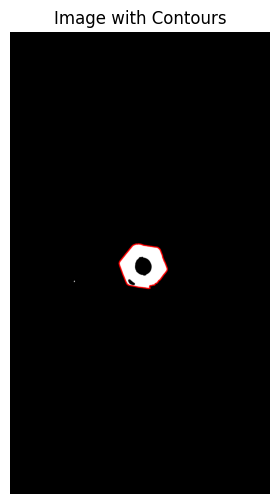

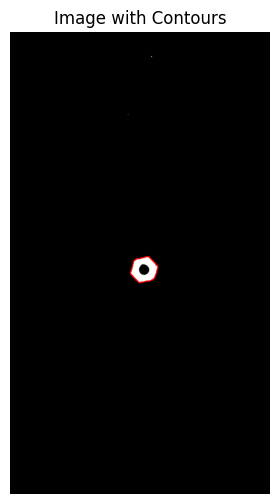

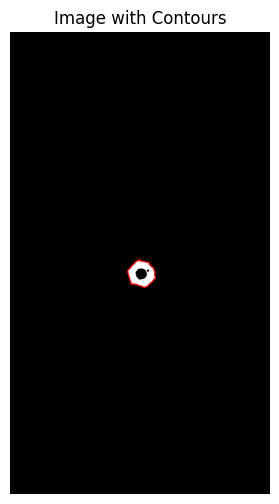

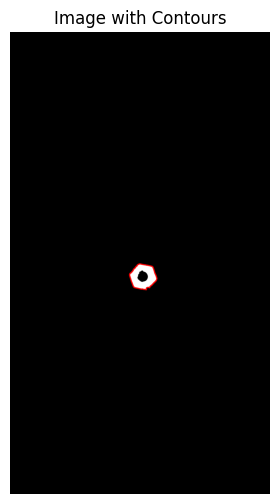

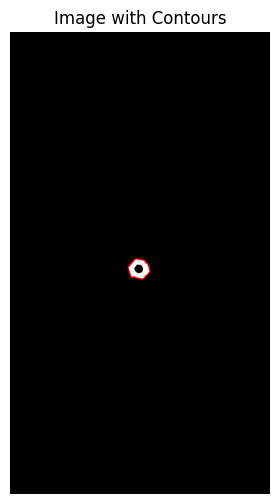

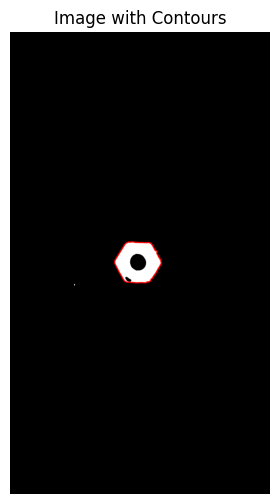

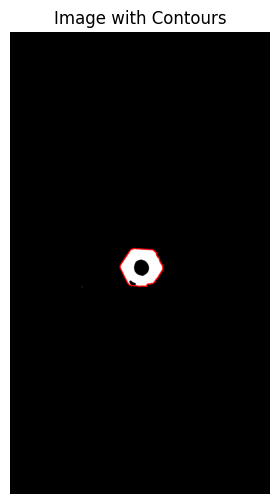

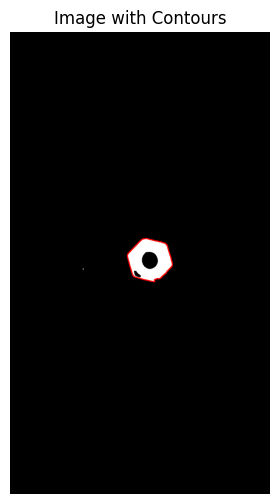

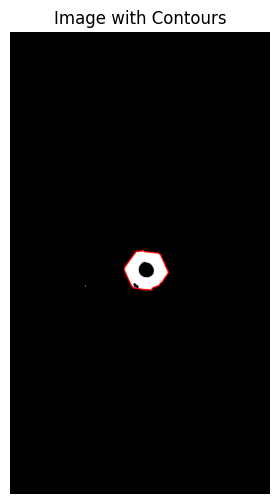

In [10]:
contours_list = []

for index, image in enumerate(filtered_images):
    contours = find_and_filter_contours(image, min_length=100)
    assert(len(contours)>0)
    contours_list.append(contours)

    img_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color contours
    cv2.drawContours(img_with_contours, contours, -1, (0, 0, 255), 10)  # Red contours, thickness=2

    # Plot the image and contours
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title('Image with Contours')
    plt.axis('off')
    plt.show()

# Crop the images around the main contour's bounding box

In [11]:
def crop_objects(images, contours_list):
    cropped_images = []
    adjusted_contours_list = []
    adjusted_hulls_list = []
    for image, contours in zip(images, contours_list):
        all_points = np.vstack(contours)
        cv2_contours = np.array(all_points, dtype=np.int32)
        # Compute convex hull of the main contour
        convex_hull = cv2.convexHull(cv2_contours)

        # Get bounding rectangle around the convex hull
        x, y, w, h = cv2.boundingRect(convex_hull)

        # Crop the image using the bounding rectangle
        cropped = image[y:y+h, x:x+w]

        # Adjust the contours by shifting them to the cropped image coordinate system
        adjusted_contours = [cnt - np.array([x, y]) for cnt in cv2_contours]
        adjusted_hull = convex_hull - np.array([x, y])

        cropped_images.append(cropped)
        adjusted_contours_list.append(adjusted_contours)
        adjusted_hulls_list.append(adjusted_hull)

    return cropped_images, adjusted_contours_list, adjusted_hulls_list

In [12]:
cropped_images, adjusted_contours_list, adjusted_hulls_list = crop_objects(images, contours_list)

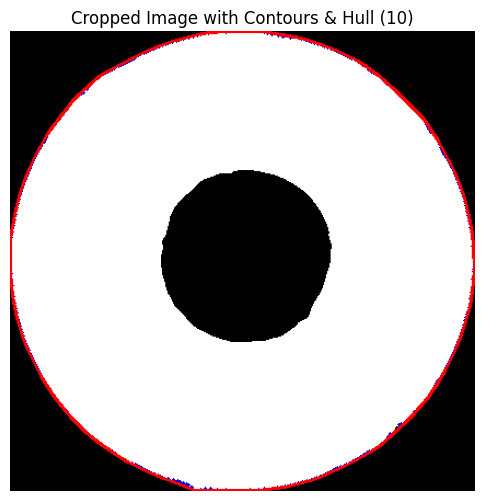

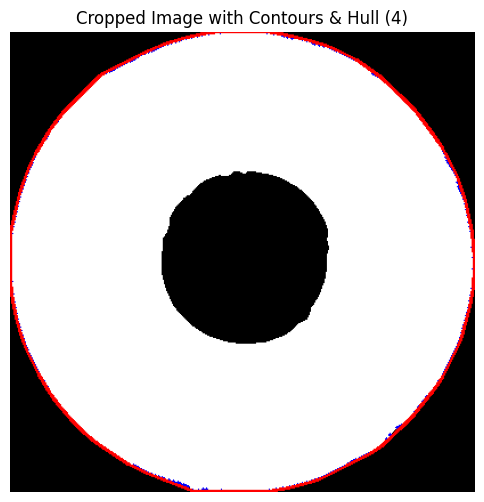

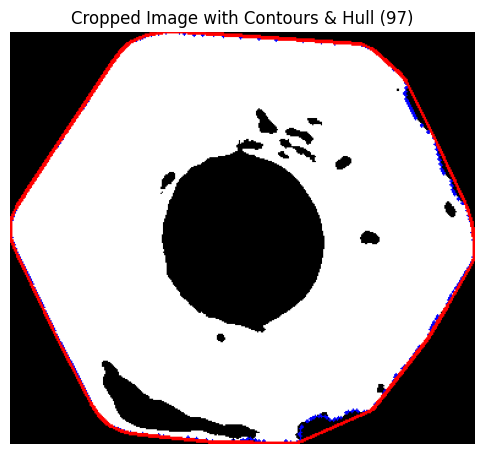

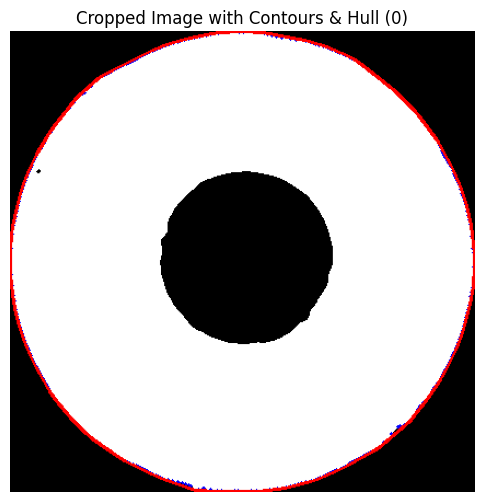

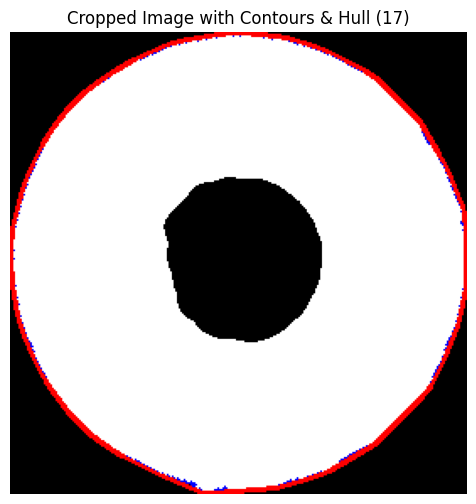

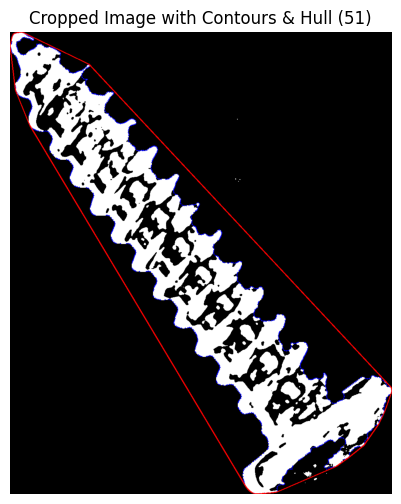

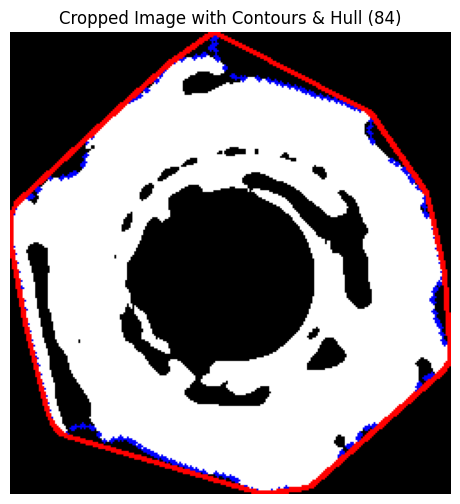

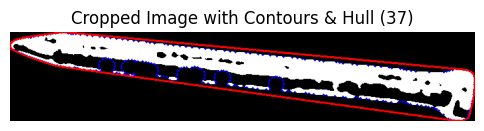

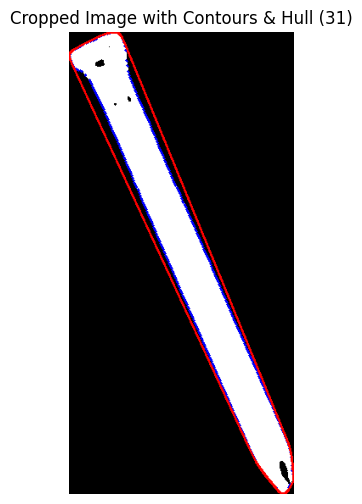

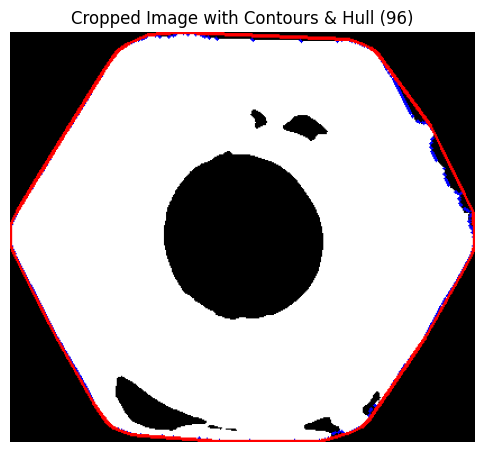

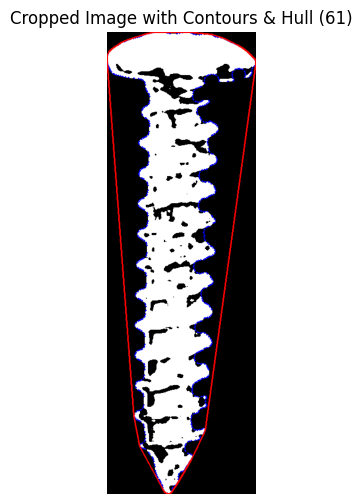

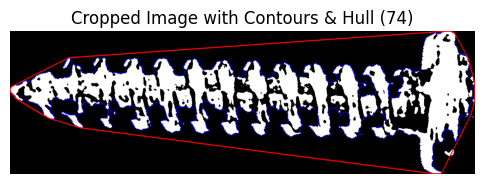

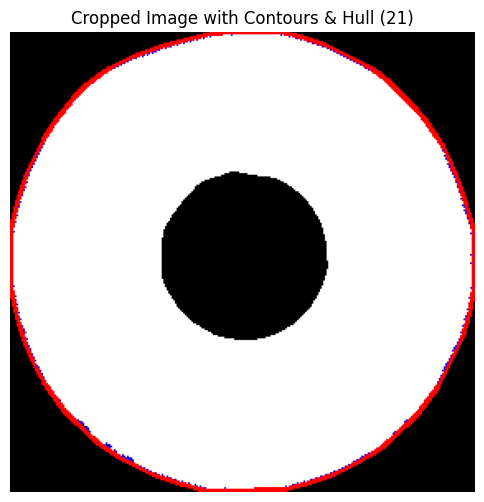

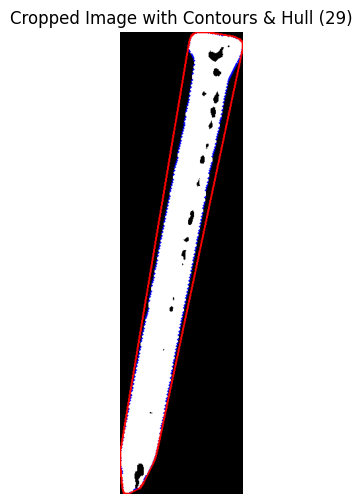

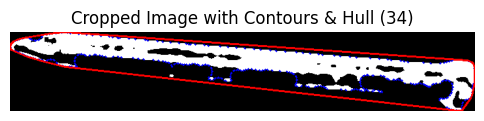

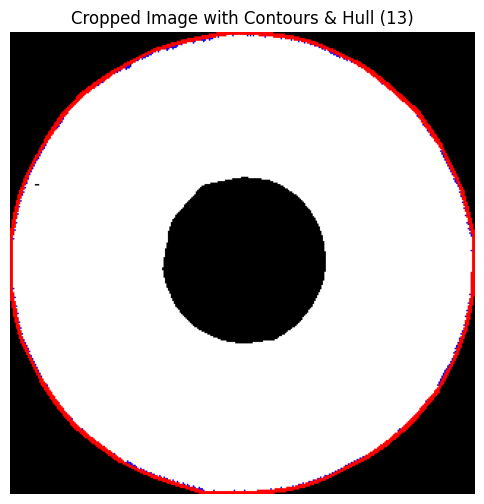

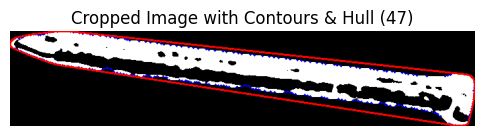

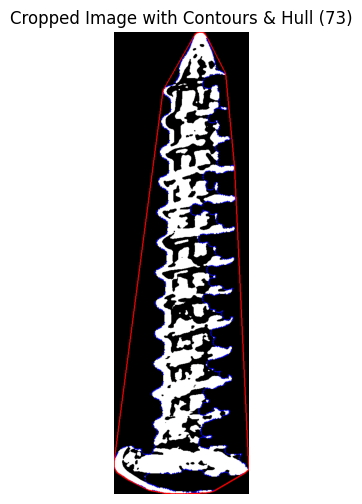

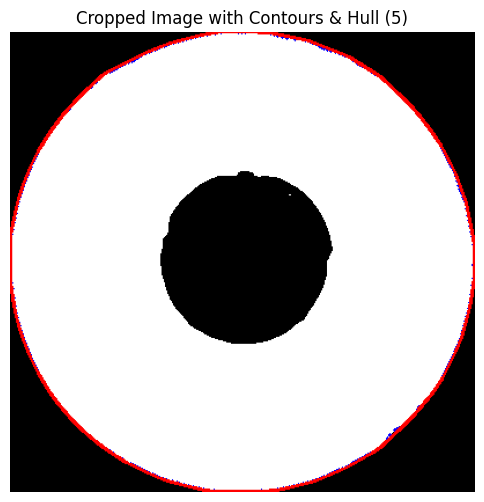

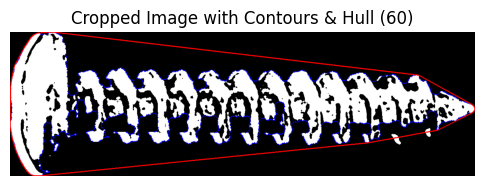

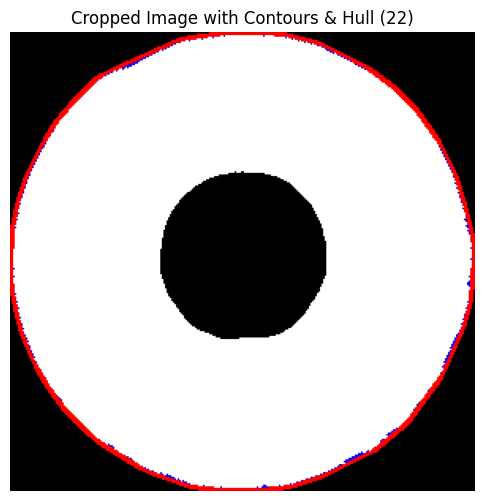

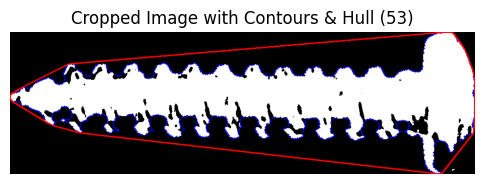

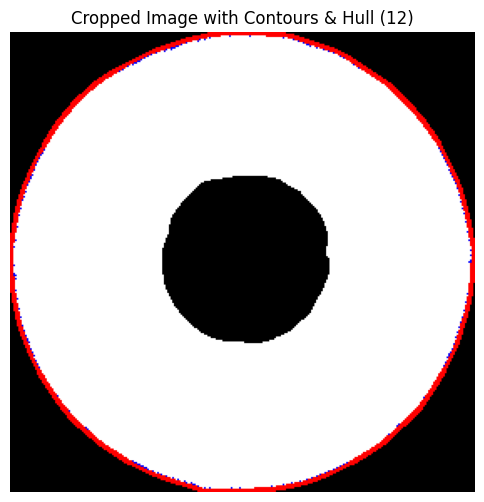

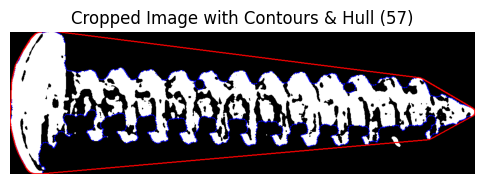

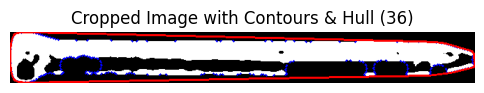

In [128]:
import random  

# Select a few random samples for visualization
num_samples = 25  # Adjust as needed
sample_indices = random.sample(range(len(images)), num_samples)

# Plot cropped images with contours and hulls
for idx in sample_indices:
    cropped = cropped_images[idx]
    contours = adjusted_contours_list[idx]
    hull = adjusted_hulls_list[idx]

    # Convert grayscale image to BGR for colored contour drawing
    img_with_contours = cv2.cvtColor(cropped, cv2.COLOR_GRAY2BGR)

    # Draw adjusted contours in blue
    cv2.drawContours(img_with_contours, contours, -1, (255, 0, 0), 2)  # Blue contours

    # Draw convex hull in red
    cv2.drawContours(img_with_contours, [hull], -1, (0, 0, 255), 2)  # Red hull

    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title(f'Cropped Image with Contours & Hull ({idx})')
    plt.axis('off')
    plt.show()

# Compare the area of the convex Hull and the minEnclosingCircle

Circle Center: (211.37478637695312, 210.43655395507812), Radius: 212.82476806640625, Area: 142296.4974338461
Hull area: 139762.0
Area ratio: 0.9821886168700366


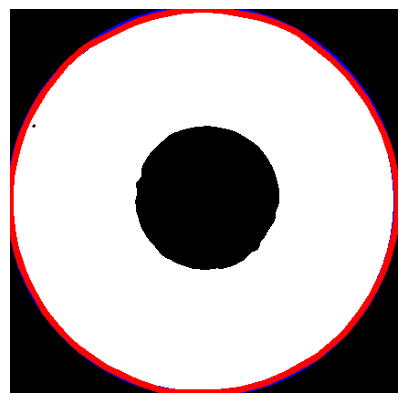

Circle Center: (182.03294372558594, 185.90672302246094), Radius: 186.71665954589844, Area: 109525.69324802292
Hull area: 105195.5
Area ratio: 0.9604641329389524


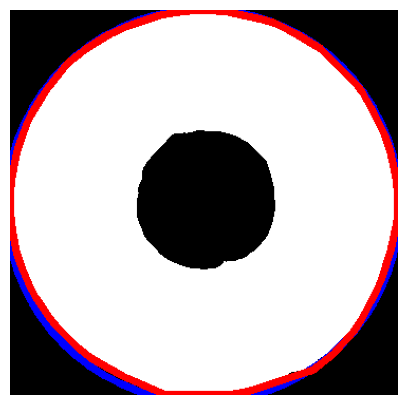

Circle Center: (184.0, 184.5), Radius: 186.56712341308594, Area: 109350.33138912961
Hull area: 106063.0
Area ratio: 0.9699376184107623


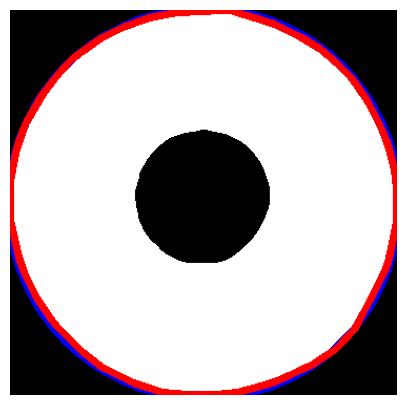

Circle Center: (150.2707977294922, 148.46263122558594), Radius: 150.9514923095703, Area: 71585.43928267917
Hull area: 70335.0
Area ratio: 0.9825322119245313


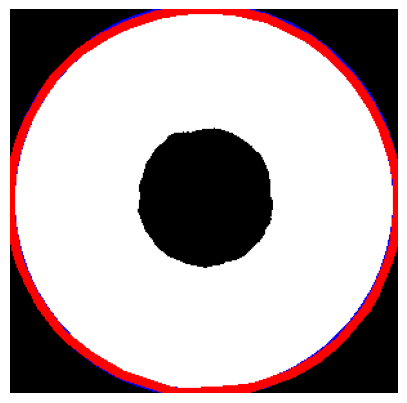

Circle Center: (202.1493377685547, 202.15414428710938), Radius: 205.0179901123047, Area: 132048.60450177712
Hull area: 129447.0
Area ratio: 0.9802981295289485


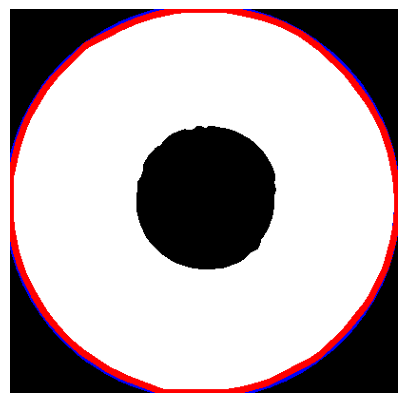

Circle Center: (200.1555938720703, 197.83616638183594), Radius: 201.34329223632812, Area: 127357.40574880017
Hull area: 125314.5
Area ratio: 0.9839592700810065


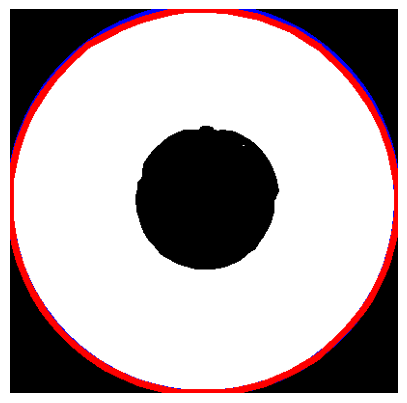

Circle Center: (200.29922485351562, 199.713623046875), Radius: 201.77012634277344, Area: 127897.95621010747
Hull area: 125812.5
Area ratio: 0.98369437423471


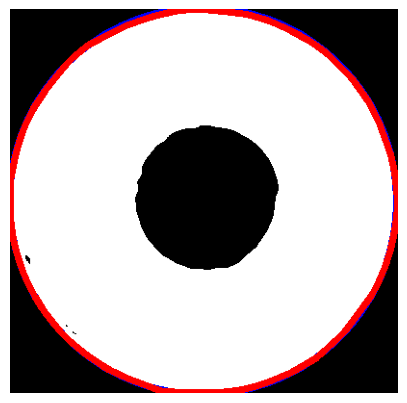

Circle Center: (195.49200439453125, 193.59335327148438), Radius: 196.79342651367188, Area: 121666.50927276196
Hull area: 119726.0
Area ratio: 0.9840505880840916


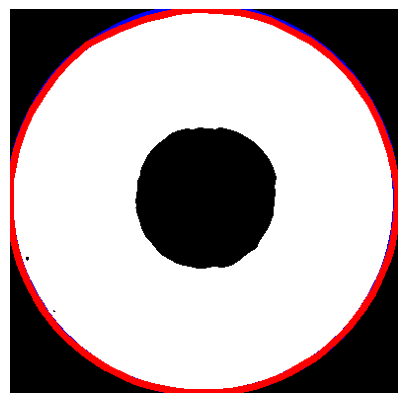

Circle Center: (215.75131225585938, 211.83792114257812), Radius: 216.92874145507812, Area: 147837.3148677921
Hull area: 144905.0
Area ratio: 0.9801652588832906


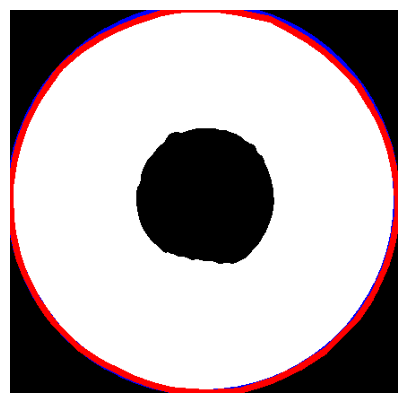

Circle Center: (245.06773376464844, 243.0146942138672), Radius: 246.06297302246094, Area: 190213.96859063554
Hull area: 187482.5
Area ratio: 0.9856400210201491


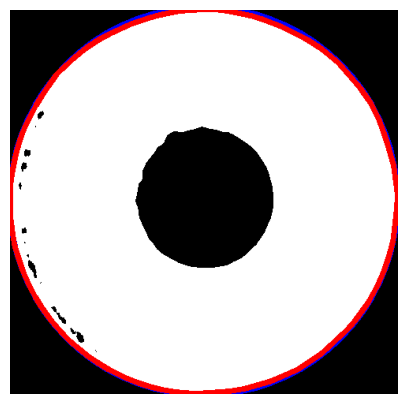

Circle Center: (210.96600341796875, 209.9867401123047), Radius: 213.18472290039062, Area: 142778.24236937152
Hull area: 139843.5
Area ratio: 0.9794454510668421


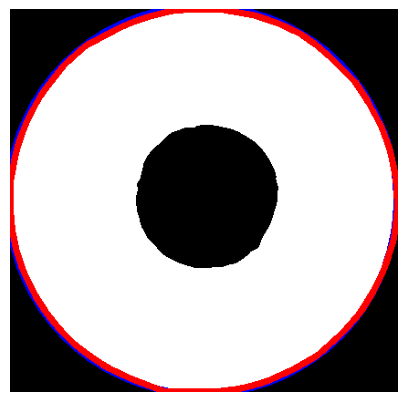

Circle Center: (210.9691925048828, 210.5455780029297), Radius: 212.83714294433594, Area: 142313.04581772204
Hull area: 139848.0
Area ratio: 0.9826787080301876


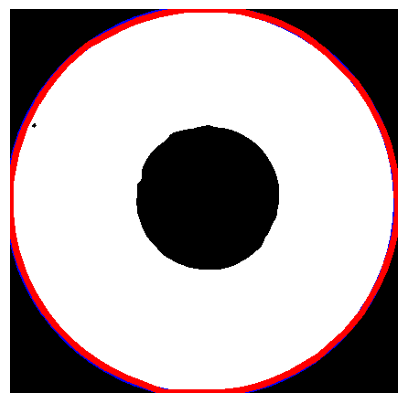

Circle Center: (138.4495391845703, 136.98899841308594), Radius: 138.67994689941406, Area: 60419.51100733253
Hull area: 59360.0
Area ratio: 0.9824640916540364


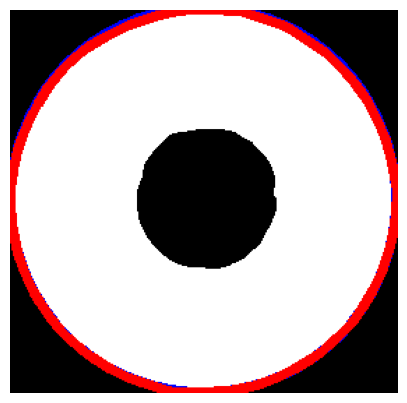

Circle Center: (158.39271545410156, 158.2933807373047), Radius: 159.6588592529297, Area: 80082.18545630861
Hull area: 78642.0
Area ratio: 0.9820161569255081


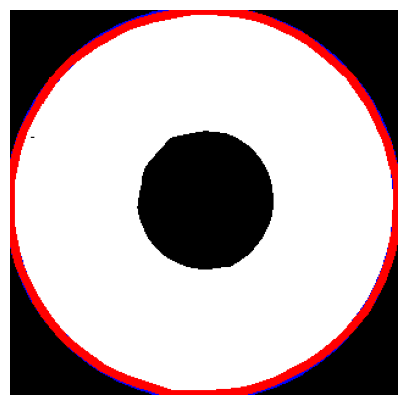

Circle Center: (147.11666870117188, 146.79566955566406), Radius: 148.1201629638672, Area: 68925.23175913788
Hull area: 67703.5
Area ratio: 0.9822745353485749


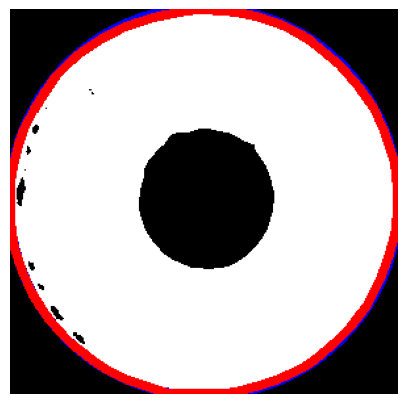

Circle Center: (224.8673095703125, 222.93724060058594), Radius: 226.77566528320312, Area: 161563.3211434267
Hull area: 158486.0
Area ratio: 0.9809528479505888


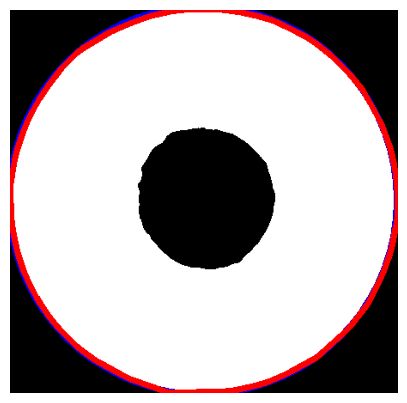

Circle Center: (237.1664581298828, 236.5959014892578), Radius: 239.46527099609375, Area: 180150.2827974456
Hull area: 177103.5
Area ratio: 0.9830875491831934


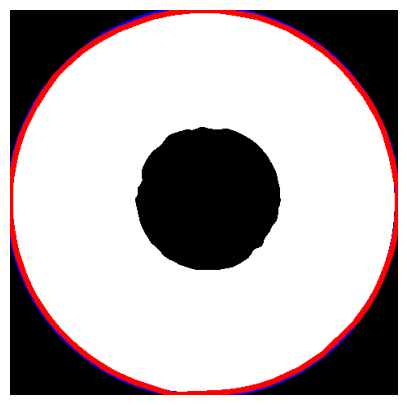

Circle Center: (135.3556365966797, 137.3251190185547), Radius: 137.34542846679688, Area: 59262.27094887076
Hull area: 57423.0
Area ratio: 0.9689638800636308


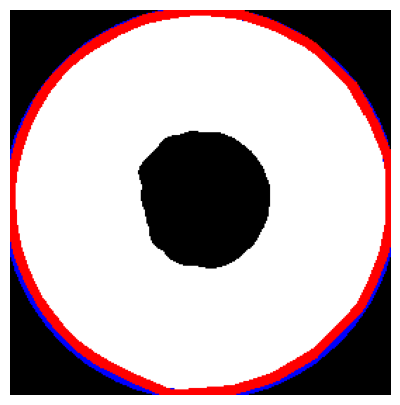

Circle Center: (141.2344970703125, 139.3496856689453), Radius: 141.30157470703125, Area: 62725.46308272178
Hull area: 61716.5
Area ratio: 0.9839146172362065


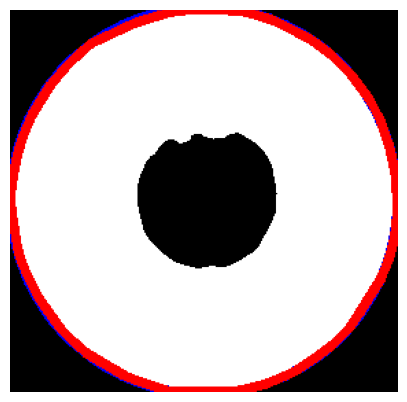

Circle Center: (143.69332885742188, 143.3503875732422), Radius: 145.50686645507812, Area: 66514.5793597852
Hull area: 64745.5
Area ratio: 0.9734031339172117


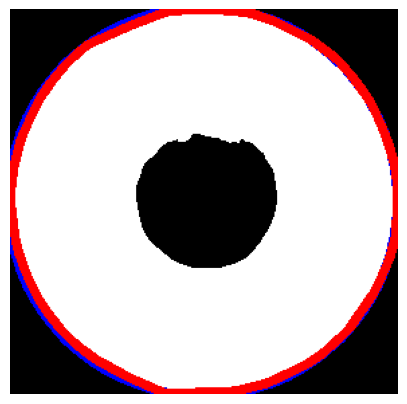

Circle Center: (149.1258544921875, 151.92909240722656), Radius: 152.08462524414062, Area: 72664.2000126119
Hull area: 70364.5
Area ratio: 0.9683516778246681


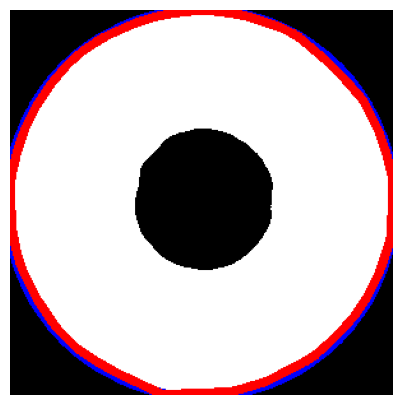

Circle Center: (140.16934204101562, 138.12315368652344), Radius: 141.80307006835938, Area: 63171.492792409554
Hull area: 61885.0
Area ratio: 0.9796349154414136


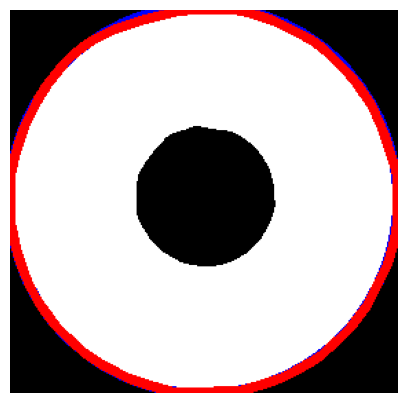

Circle Center: (146.23907470703125, 143.60862731933594), Radius: 146.97100830078125, Area: 67859.90073986044
Hull area: 66668.5
Area ratio: 0.9824432289633365


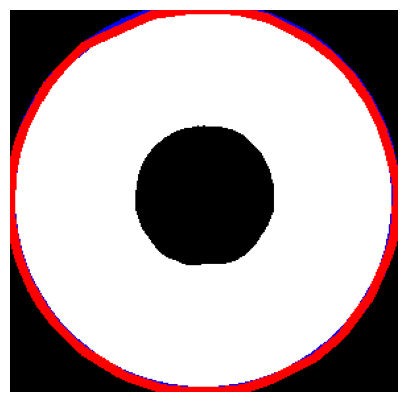

Circle Center: (153.1299591064453, 150.7323455810547), Radius: 153.46397399902344, Area: 73988.2496202917
Hull area: 72740.0
Area ratio: 0.9831290829733408


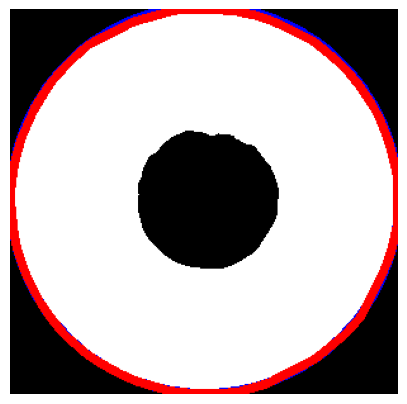

Circle Center: (185.00559997558594, 189.15721130371094), Radius: 189.642578125, Area: 112985.20403834112
Hull area: 108864.5
Area ratio: 0.9635288171277473


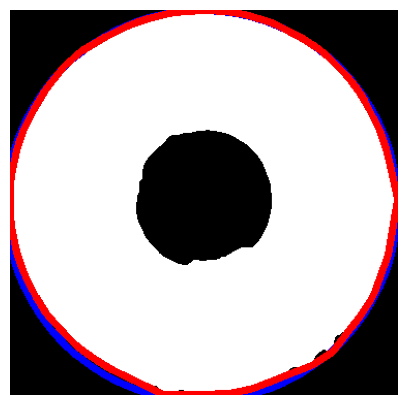

Circle Center: (340.5, 34.5), Radius: 340.6619567871094, Area: 364583.6143933503
Hull area: 40508.5
Area ratio: 0.11110894291671392


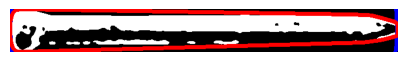

Circle Center: (34.5, 322.5), Radius: 323.5870056152344, Area: 328951.6120858888
Hull area: 38322.5
Area ratio: 0.11649889707789013


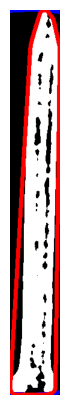

Circle Center: (41.5, 321.5), Radius: 323.13861083984375, Area: 328040.586697999
Hull area: 38293.5
Area ratio: 0.1167340309485966


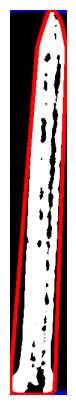

Circle Center: (82.5, 357.5), Radius: 360.2867736816406, Area: 407799.3330529986
Hull area: 47978.0
Area ratio: 0.1176510016355634


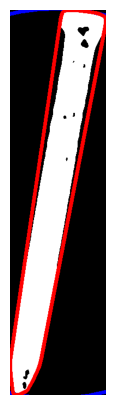

Circle Center: (89.0, 352.0), Radius: 355.3548583984375, Area: 396711.1323537773
Hull area: 46458.0
Area ratio: 0.11710788080070789


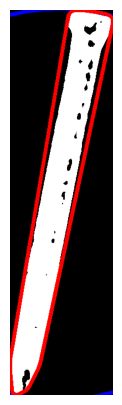

Circle Center: (47.0, 365.5), Radius: 366.2230529785156, Area: 421348.2846569986
Hull area: 49503.5
Area ratio: 0.11748831501782109


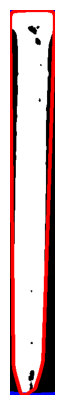

Circle Center: (146.5, 273.5), Radius: 291.0782470703125, Area: 266176.29421853763
Hull area: 31117.5
Area ratio: 0.11690560232404365


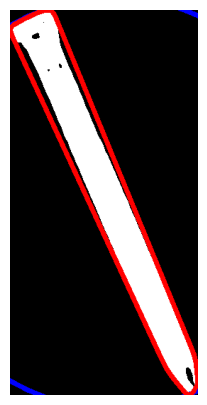

Circle Center: (156.0, 311.0), Radius: 334.5520324707031, Area: 351622.9538835416
Hull area: 40543.5
Area ratio: 0.11530390593734706


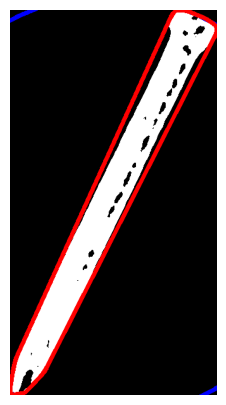

Circle Center: (334.4252624511719, 35.0), Radius: 334.5748291015625, Area: 351670.87522913417
Hull area: 36903.0
Area ratio: 0.10493618493699694


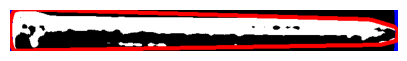

Circle Center: (356.0, 50.5), Radius: 356.98504638671875, Area: 400359.3004024557
Hull area: 44154.0
Area ratio: 0.11028593554743152


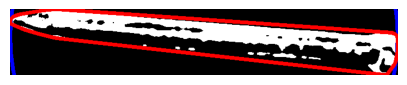

Circle Center: (347.5, 53.0), Radius: 349.25823974609375, Area: 383215.61259994435
Hull area: 42374.5
Area ratio: 0.11057613157383701


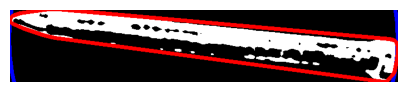

Circle Center: (332.5, 36.5), Radius: 332.69891357421875, Area: 347738.38921721204
Hull area: 38793.5
Area ratio: 0.11155944009324764


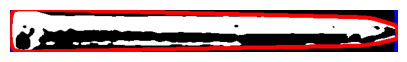

Circle Center: (347.0, 54.5), Radius: 349.0205078125, Area: 382694.09830192884
Hull area: 42827.5
Area ratio: 0.11191053164925209


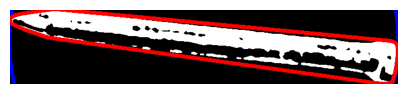

Circle Center: (347.5, 58.5), Radius: 349.73785400390625, Area: 384268.8268017934
Hull area: 42747.0
Area ratio: 0.1112424350311637


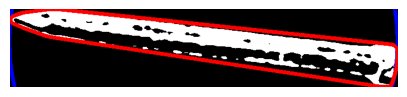

Circle Center: (36.0, 321.5), Radius: 322.8967590332031, Area: 327549.7291150607
Hull area: 38173.5
Area ratio: 0.11654260897462237


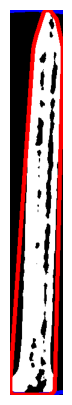

Circle Center: (52.79844665527344, 361.4775390625), Radius: 361.7186584472656, Area: 411047.2013217427
Hull area: 48166.5
Area ratio: 0.11717997311529729


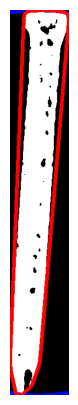

Circle Center: (53.0, 366.0), Radius: 367.0777282714844, Area: 423317.22777580324
Hull area: 49173.0
Area ratio: 0.11616111221923371


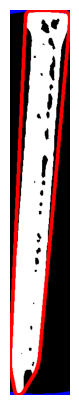

Circle Center: (201.09503173828125, 321.85723876953125), Radius: 360.4562072753906, Area: 408182.97829536826
Hull area: 47342.0
Area ratio: 0.11598229842338627


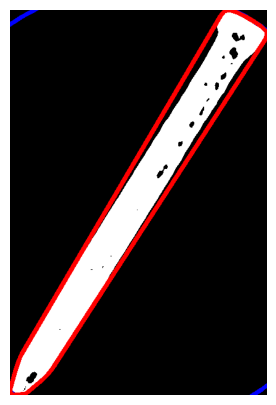

Circle Center: (352.87109375, 37.5), Radius: 353.2567443847656, Area: 392040.3759664262
Hull area: 43755.0
Area ratio: 0.1116084023033054


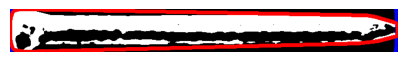

Circle Center: (350.5, 48.5), Radius: 351.7393493652344, Area: 388679.63347026776
Hull area: 42855.5
Area ratio: 0.1102591859968867


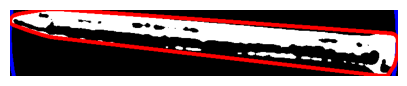

Circle Center: (336.0, 54.5), Radius: 337.976806640625, Area: 358858.8566835763
Hull area: 39831.0
Area ratio: 0.11099349858075531


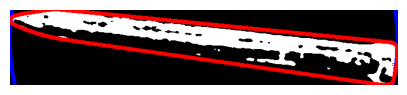

Circle Center: (329.0, 50.0), Radius: 330.45733642578125, Area: 343068.36179938563
Hull area: 37999.5
Area ratio: 0.11076363847920426


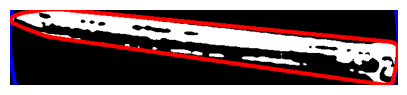

Circle Center: (345.5, 58.5), Radius: 347.98358154296875, Area: 380423.53781482513
Hull area: 42585.0
Area ratio: 0.11194102300980299


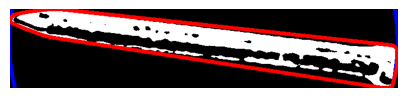

Circle Center: (31.374221801757812, 327.2063903808594), Radius: 327.62860107421875, Area: 337220.126992448
Hull area: 39349.0
Area ratio: 0.11668639221193702


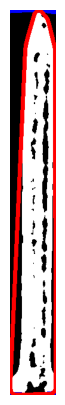

Circle Center: (29.729476928710938, 329.5802307128906), Radius: 330.2030944824219, Area: 342540.6760467736
Hull area: 39496.5
Area ratio: 0.11530455435490175


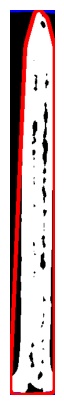

Circle Center: (484.0, 116.0), Radius: 484.1033935546875, Area: 736251.3884216858
Hull area: 193830.5
Area ratio: 0.2632667361286987


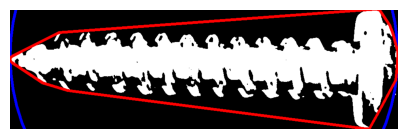

Circle Center: (471.0940856933594, 562.9320068359375), Radius: 724.444091796875, Area: 1648768.2755676988
Hull area: 460560.5
Area ratio: 0.27933610006016235


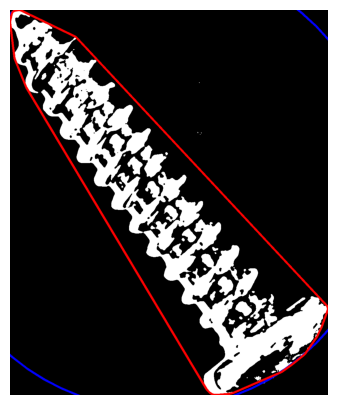

Circle Center: (649.3057250976562, 544.537109375), Radius: 709.4684448242188, Area: 1581306.4439684607
Hull area: 431982.5
Area ratio: 0.27318076243077394


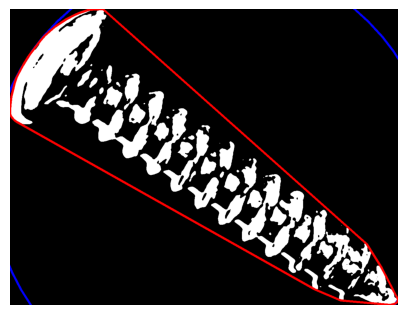

Circle Center: (462.3451232910156, 137.39785766601562), Radius: 462.51141357421875, Area: 672039.471507044
Hull area: 177058.0
Area ratio: 0.26346369150453114


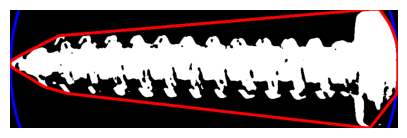

Circle Center: (585.5, 141.5), Radius: 585.7615966796875, Area: 1077932.7411358594
Hull area: 284196.5
Area ratio: 0.2636495665773462


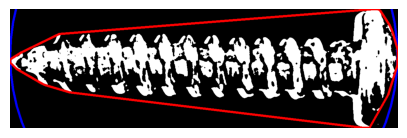

Circle Center: (571.6304931640625, 169.99984741210938), Radius: 572.2216186523438, Area: 1028675.498517339
Hull area: 274481.5
Area ratio: 0.2668300162642334


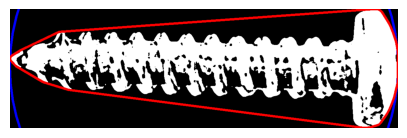

Circle Center: (568.9923095703125, 187.36996459960938), Radius: 570.1068725585938, Area: 1021086.2440850314
Hull area: 266431.5
Area ratio: 0.2609294773515848


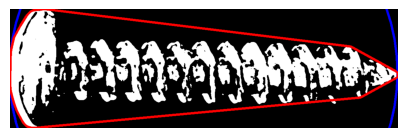

Circle Center: (559.1964111328125, 190.0129852294922), Radius: 559.8473510742188, Area: 984666.4213371213
Hull area: 257607.5
Area ratio: 0.2616190563807219


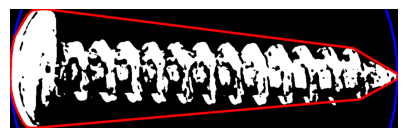

Circle Center: (548.9766235351562, 184.03636169433594), Radius: 550.1535034179688, Area: 950862.3214684111
Hull area: 248978.5
Area ratio: 0.2618449531321253


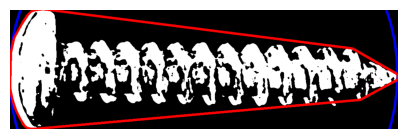

Circle Center: (616.2431640625, 203.6290740966797), Radius: 617.7676391601562, Area: 1198947.5431283263
Hull area: 314239.5
Area ratio: 0.26209612071940847


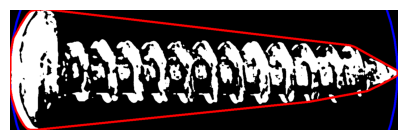

Circle Center: (604.13427734375, 200.17494201660156), Radius: 605.869873046875, Area: 1153210.5002038393
Hull area: 302031.0
Area ratio: 0.26190448313349


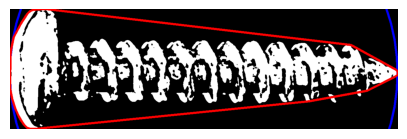

Circle Center: (125.67552947998047, 433.2168884277344), Radius: 434.93994140625, Area: 594303.7299232506
Hull area: 164061.0
Area ratio: 0.2760558141224978


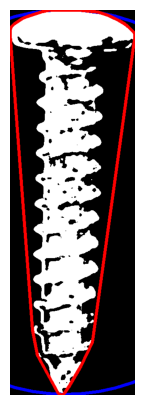

Circle Center: (128.32498168945312, 430.584228515625), Radius: 431.7635192871094, Area: 585654.8749464607
Hull area: 161869.0
Area ratio: 0.276389742362851


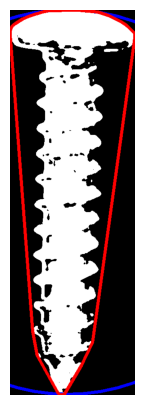

Circle Center: (145.28758239746094, 401.3653564453125), Radius: 401.4599609375, Area: 506330.8028795566
Hull area: 127533.0
Area ratio: 0.2518768348176852


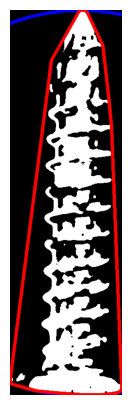

Circle Center: (169.0, 550.0), Radius: 551.4527587890625, Area: 955358.7820407246
Hull area: 260025.0
Area ratio: 0.27217523394149923


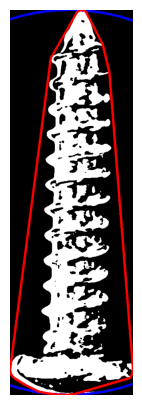

Circle Center: (707.5, 367.5), Radius: 753.8333129882812, Area: 1785256.0929972955
Hull area: 458710.5
Area ratio: 0.25694380867781463


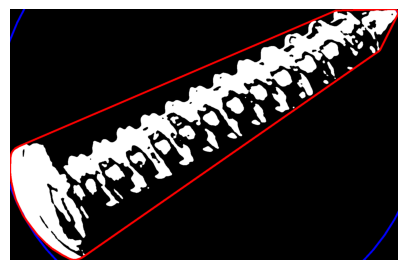

Circle Center: (593.0474243164062, 567.289794921875), Radius: 679.6121826171875, Area: 1451015.940155293
Hull area: 403159.0
Area ratio: 0.2778460172924444


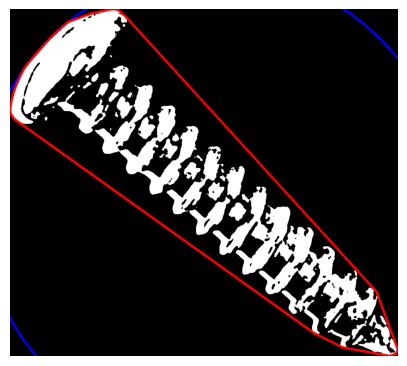

Circle Center: (628.8877563476562, 212.0652313232422), Radius: 635.9951782226562, Area: 1270742.393746821
Hull area: 324869.0
Area ratio: 0.2556529172227538


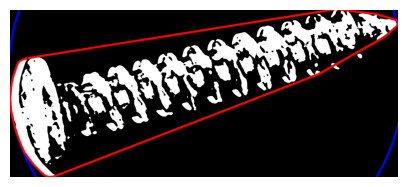

Circle Center: (125.12696075439453, 419.982666015625), Radius: 420.4526672363281, Area: 555372.1485234369
Hull area: 153292.0
Area ratio: 0.27601672213407913


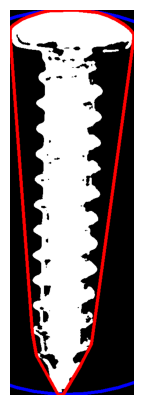

Circle Center: (121.5136489868164, 414.3051452636719), Radius: 414.9150085449219, Area: 540839.2003773059
Hull area: 147973.0
Area ratio: 0.2735988809553182


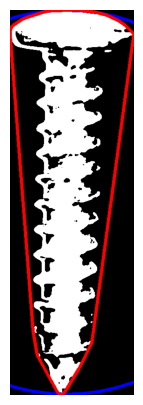

Circle Center: (114.5414047241211, 387.7773132324219), Radius: 388.31671142578125, Area: 473720.342714923
Hull area: 128788.0
Area ratio: 0.27186504016675184


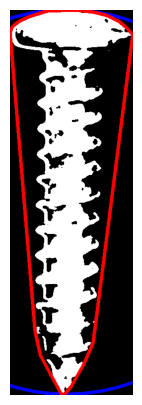

Circle Center: (96.76786041259766, 354.9867858886719), Radius: 357.4902038574219, Area: 401493.17190930835
Hull area: 100050.0
Area ratio: 0.2491947734109906


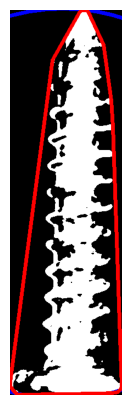

Circle Center: (102.0, 361.5), Radius: 363.1904602050781, Area: 414399.037257089
Hull area: 110871.5
Area ratio: 0.267547677557022


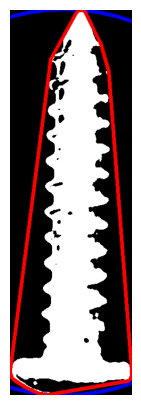

Circle Center: (171.5, 570.5), Radius: 572.3116455078125, Area: 1028999.2042369038
Hull area: 261840.0
Area ratio: 0.2544608381832308


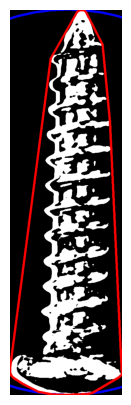

Circle Center: (588.1976928710938, 152.9997100830078), Radius: 588.252197265625, Area: 1087118.7563053996
Hull area: 287045.0
Area ratio: 0.2640419902012634


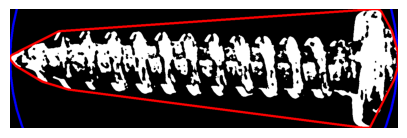

Circle Center: (215.5, 192.0), Radius: 215.61376953125, Area: 146050.43584675936
Hull area: 125656.0
Area ratio: 0.860360321908537


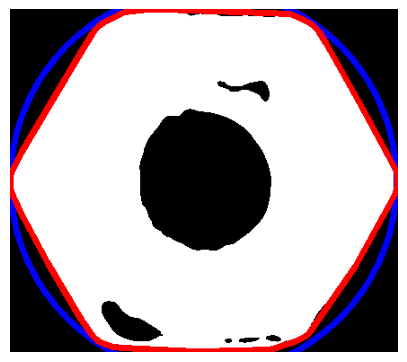

Circle Center: (206.0, 181.5), Radius: 206.8291473388672, Area: 134391.98104020822
Hull area: 112841.5
Area ratio: 0.8396445913409029


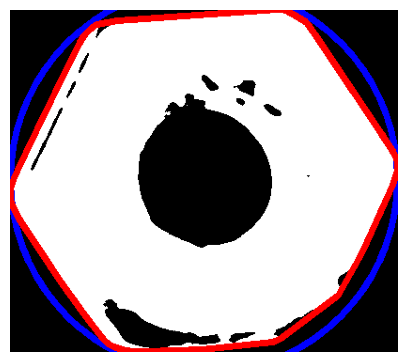

Circle Center: (211.0, 186.0), Radius: 212.1439208984375, Area: 141387.5130104404
Hull area: 119042.5
Area ratio: 0.8419590773282052


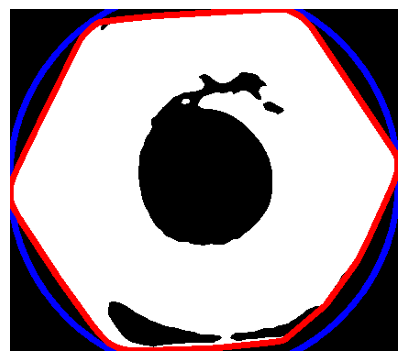

Circle Center: (135.5, 119.0), Radius: 135.5591278076172, Area: 57730.77723810159
Hull area: 49206.5
Area ratio: 0.8523443188207126


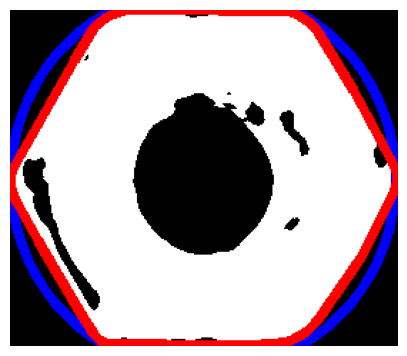

Circle Center: (106.97663879394531, 95.5), Radius: 107.11802673339844, Area: 36047.48752488281
Hull area: 31180.5
Area ratio: 0.8649840014086077


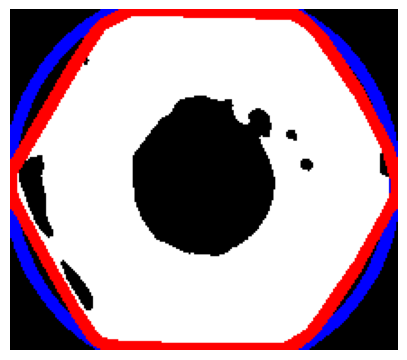

Circle Center: (111.5, 119.0), Radius: 121.70157623291016, Area: 46530.98851294515
Hull area: 40570.0
Area ratio: 0.8718920722845427


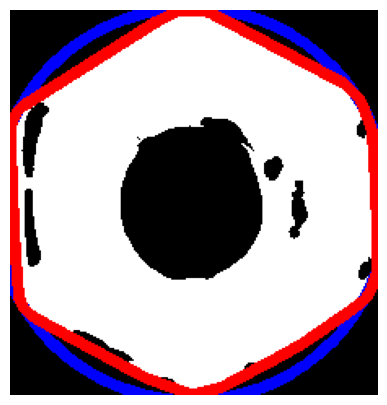

Circle Center: (111.5, 104.5), Radius: 112.57229614257812, Area: 39811.90157410082
Hull area: 34276.0
Area ratio: 0.8609485768019145


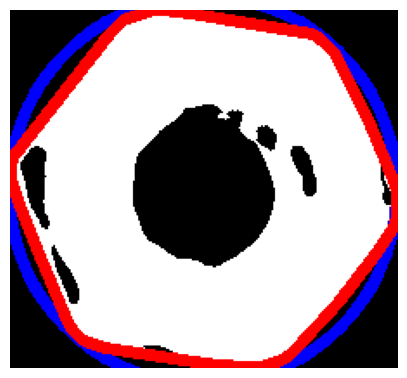

Circle Center: (101.0, 90.5), Radius: 101.35713958740234, Area: 32274.428760306942
Hull area: 27698.0
Area ratio: 0.8582026410352671


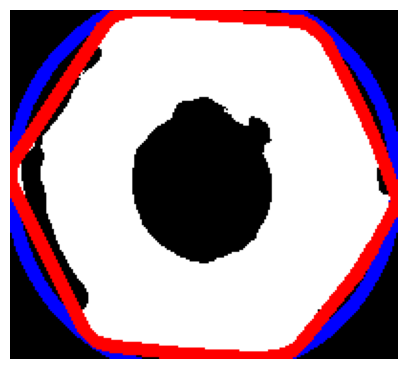

Circle Center: (100.32328796386719, 93.42105865478516), Radius: 100.59748840332031, Area: 31792.461096269584
Hull area: 27682.0
Area ratio: 0.870709565899197


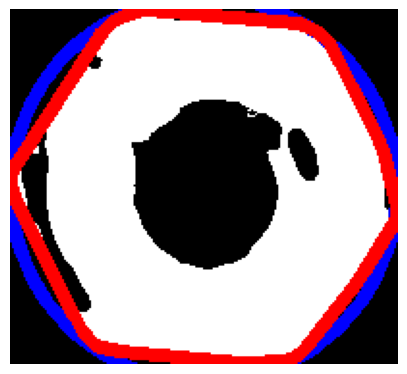

Circle Center: (122.40916442871094, 131.31861877441406), Radius: 131.7306365966797, Area: 54515.933596064824
Hull area: 44864.0
Area ratio: 0.8229520626468454


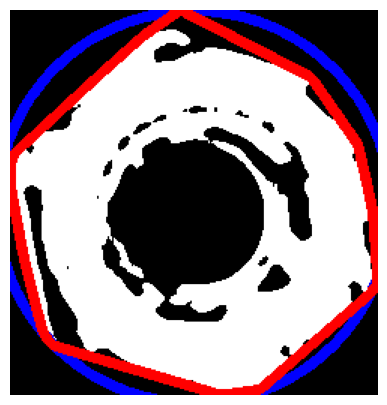

Circle Center: (136.2165069580078, 145.01708984375), Radius: 149.1304168701172, Area: 69868.64750727135
Hull area: 58439.0
Area ratio: 0.8364123549682017


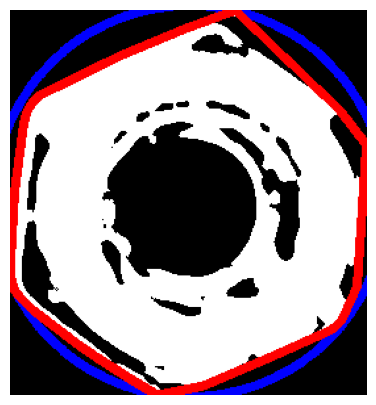

Circle Center: (128.1798858642578, 133.98690795898438), Radius: 135.49815368652344, Area: 57678.85462990581
Hull area: 48579.0
Area ratio: 0.8422323971532604


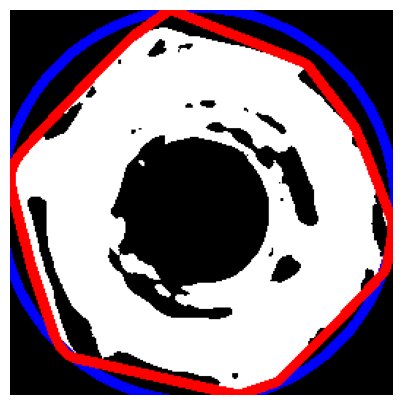

Circle Center: (141.52377319335938, 135.4257049560547), Radius: 147.92982482910156, Area: 68748.20426197317
Hull area: 58356.5
Area ratio: 0.8488439898390022


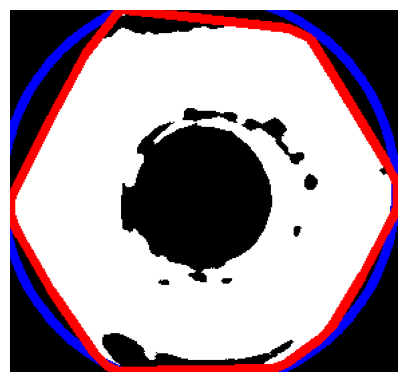

Circle Center: (135.1750030517578, 140.18310546875), Radius: 143.18699645996094, Area: 64410.55350504196
Hull area: 53341.5
Area ratio: 0.8281484492416994


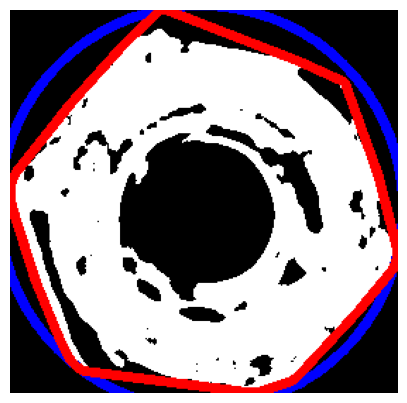

Circle Center: (141.15576171875, 144.24449157714844), Radius: 146.77853393554688, Area: 67682.27742643567
Hull area: 58240.5
Area ratio: 0.8604985265648307


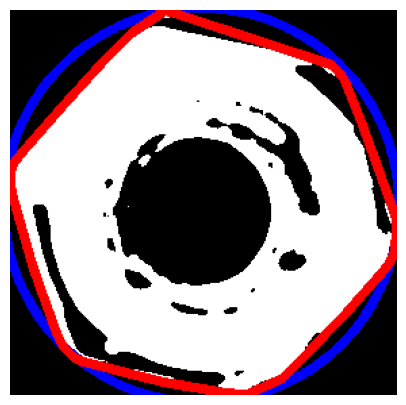

Circle Center: (138.51962280273438, 144.1212158203125), Radius: 146.72520446777344, Area: 67633.10396736967
Hull area: 55944.0
Area ratio: 0.8271688968613772


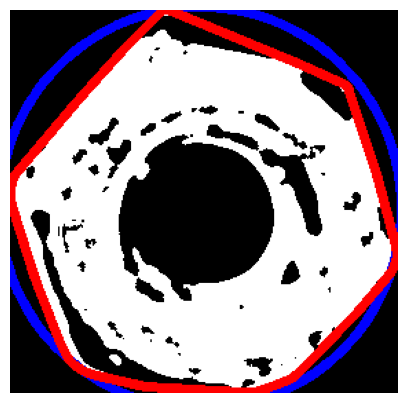

Circle Center: (213.0, 199.5), Radius: 215.0332489013672, Area: 145265.03932202398
Hull area: 124207.0
Area ratio: 0.8550371140894922


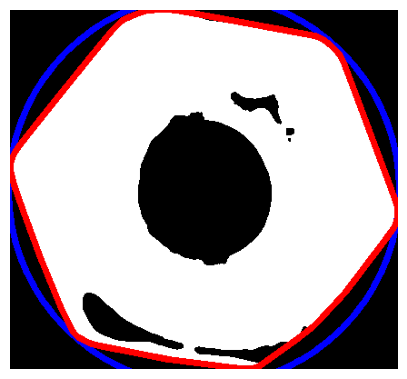

Circle Center: (121.5, 118.0), Radius: 124.91307067871094, Area: 49019.13482314958
Hull area: 41399.0
Area ratio: 0.8445477495545082


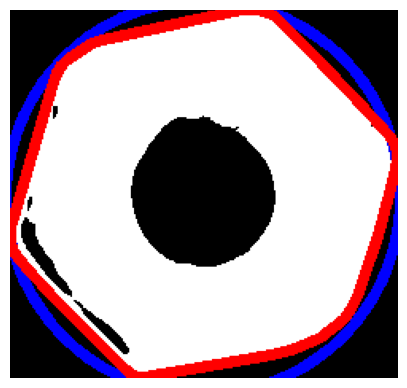

Circle Center: (122.81621551513672, 127.99275207519531), Radius: 129.5177764892578, Area: 52699.759432025996
Hull area: 44133.5
Area ratio: 0.8374516406839568


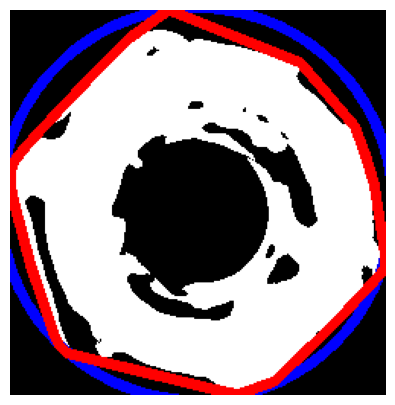

Circle Center: (120.96959686279297, 115.68040466308594), Radius: 122.89714050292969, Area: 47449.695404923834
Hull area: 40879.0
Area ratio: 0.8615229170840579


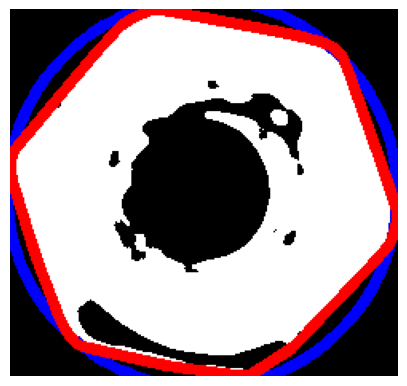

Circle Center: (96.5, 93.5), Radius: 98.45059204101562, Area: 30449.94671522729
Hull area: 25842.0
Area ratio: 0.8486714358379168


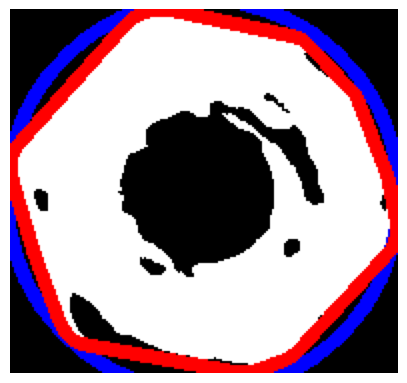

Circle Center: (206.5, 180.5), Radius: 206.6749725341797, Area: 134191.69848636352
Hull area: 116357.0
Area ratio: 0.8670953666468729


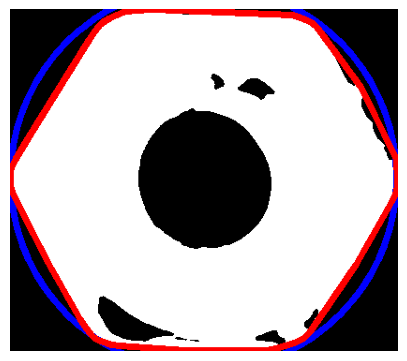

Circle Center: (189.5, 169.0), Radius: 190.0165557861328, Area: 113431.26003939731
Hull area: 97549.0
Area ratio: 0.8599833940495677


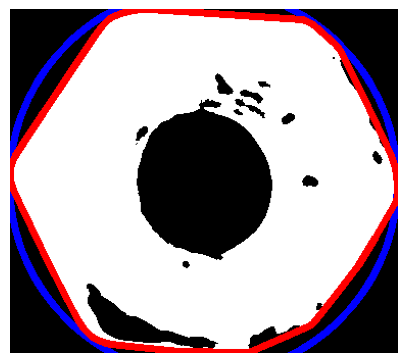

Circle Center: (199.64056396484375, 190.072021484375), Radius: 204.141845703125, Area: 130922.39662017967
Hull area: 113049.5
Area ratio: 0.8634848041162054


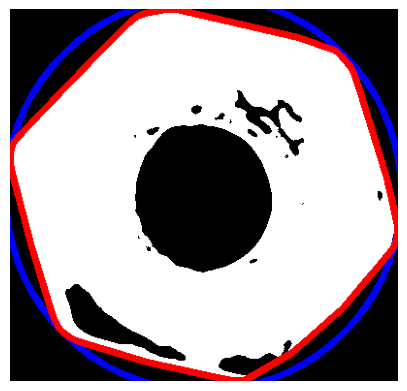

Circle Center: (194.5, 182.5), Radius: 195.4751739501953, Area: 120041.96316037927
Hull area: 101651.0
Area ratio: 0.8467955481883577


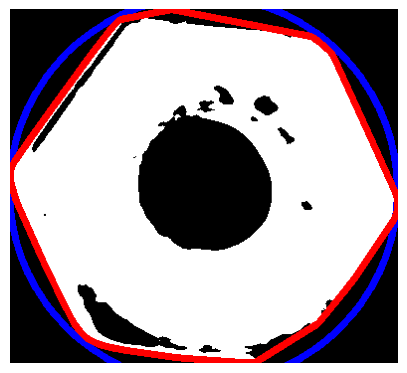

In [129]:
import math
features['circle_area_ratio'] = []
for cropped,contours,hull in zip(cropped_images, adjusted_contours_list, adjusted_hulls_list):
    # Get the minEnclosingCircle
    (x, y), radius = cv2.minEnclosingCircle(hull)

    circle_area = math.pi * (radius ** 2)
    print(f"Circle Center: ({x}, {y}), Radius: {radius}, Area: {circle_area}")

    hull_area = cv2.contourArea(hull)
    print(f"Hull area: {hull_area}")

    area_ratio = hull_area / circle_area
    print(f'Area ratio: {area_ratio}')
    features['circle_area_ratio'].append(area_ratio)
    center = (int(x), int(y))
    radius = int(radius)
    image_with_circle = cv2.cvtColor(cropped, cv2.COLOR_GRAY2BGR)
    cv2.circle(image_with_circle, center, radius, (255, 0, 0), 5)
    plt.figure(figsize=(5, 5))
    cv2.drawContours(image_with_circle, [hull], -1, (0, 0, 255), 5)
    plt.imshow(cv2.cvtColor(image_with_circle, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Compute the minor and major axis length

In [130]:
features['axis_aspect_ratio'] = []
features['eccentricity'] = []

for index, (cropped,hull) in enumerate(zip(cropped_images, adjusted_hulls_list)):
    ellipse = cv2.fitEllipse(hull)
    major_axis = ellipse[1][1]
    minor_axis = ellipse[1][0]

    print(f'Label: {labels[index]}', end=' - ')
    print(f'Minor axis: {minor_axis} - Major axis: {major_axis}', end=' - ')
    aspect_ratio = minor_axis / major_axis
    if major_axis != 0:  # To avoid division by zero
        eccentricity = np.sqrt(1 - (minor_axis ** 2 / major_axis ** 2))
    else:
        eccentricity = 0  # If major axis is 0, set eccentricity to 0 (degenerate case)


    print(f'Aspect ratio: {aspect_ratio} - Eccentricity: {eccentricity}')
    features['axis_aspect_ratio'].append(aspect_ratio)
    features['eccentricity'].append(eccentricity)

NameError: name 'labels' is not defined

# Ratio Perimeter / Area

In [41]:
features['perimeter_area_ratio'] = []
for index, (cropped,hull) in enumerate(zip(cropped_images, adjusted_hulls_list)):

    perimeter = cv2.arcLength(hull, closed=True)
    hull_area = cv2.contourArea(hull)
    print(f'Label: {labels[index]}', end=' - ')
    print(f'perimeter: {perimeter}', end=' - ')
    print(f'hull_area axis: {hull_area}', end=' - ')
    aspect_ratio = perimeter / hull_area
    print(f'Aspect ratio: {aspect_ratio}')

    features['perimeter_area_ratio'].append(aspect_ratio)

Label: arandela - perimeter: 1326.4764292240143 - hull_area axis: 139762.0 - Aspect ratio: 0.009490966279990371
Label: arandela - perimeter: 1152.0423018932343 - hull_area axis: 105195.5 - Aspect ratio: 0.010951440906628461
Label: arandela - perimeter: 1156.1640276908875 - hull_area axis: 106063.0 - Aspect ratio: 0.010900729073200716
Label: arandela - perimeter: 941.227504491806 - hull_area axis: 70335.0 - Aspect ratio: 0.013382064469919757
Label: arandela - perimeter: 1276.9772610664368 - hull_area axis: 129447.0 - Aspect ratio: 0.009864865628917138
Label: arandela - perimeter: 1255.9338593482971 - hull_area axis: 125314.5 - Aspect ratio: 0.010022254881504511
Label: arandela - perimeter: 1258.5744700431824 - hull_area axis: 125812.5 - Aspect ratio: 0.01000357253884298
Label: arandela - perimeter: 1227.5523920059204 - hull_area axis: 119726.0 - Aspect ratio: 0.010253014316071032
Label: arandela - perimeter: 1350.7648952007294 - hull_area axis: 144905.0 - Aspect ratio: 0.009321727305481

# Hu moments

In [42]:
from skimage.measure import moments_central, moments_normalized, moments_hu
import pandas as pd

hu_moments_df = pd.DataFrame(columns=['Hu_Moment_1', 'Hu_Moment_2', 'Hu_Moment_3', 'Hu_Moment_4', 'Hu_Moment_5', 'Hu_Moment_6', 'Hu_Moment_7'])

for index, im in enumerate(cropped_images):
    mu = moments_central(im)
    nu = moments_normalized(mu)
    hu_moments = moments_hu(nu)

    # Store the Hu moments in the DataFrame
    hu_moments_df.loc[index] = hu_moments.tolist()  # Convert Hu moments to a list and add the label

# Print the DataFrame to see the result
print(hu_moments_df)

    Hu_Moment_1   Hu_Moment_2   Hu_Moment_3   Hu_Moment_4   Hu_Moment_5  \
0      0.000826  5.612799e-11  1.317540e-14  6.035886e-14 -1.338158e-27   
1      0.000812  9.740852e-11  4.161317e-14  2.508532e-14  7.450339e-28   
2      0.000794  6.191904e-11  7.964434e-15  5.669203e-14 -1.189897e-27   
3      0.000805  1.327095e-10  1.141050e-14  2.330358e-14  1.412645e-28   
4      0.000821  3.529324e-11  1.669742e-14  5.203147e-14 -1.271920e-27   
..          ...           ...           ...           ...           ...   
95     0.000974  5.484100e-09  3.744565e-12  1.457579e-13 -8.770109e-27   
96     0.000854  2.985159e-09  1.058292e-13  7.833612e-16 -3.376068e-30   
97     0.000886  6.151858e-09  3.194285e-13  1.151427e-13 -2.151736e-26   
98     0.000886  3.724381e-09  3.090549e-13  8.589273e-14 -1.391436e-26   
99     0.000870  5.682762e-09  3.097651e-13  1.067893e-13 -5.780762e-27   

     Hu_Moment_6   Hu_Moment_7  
0  -2.816807e-20 -1.051946e-27  
1  -2.460351e-19  3.190765e-28  


# Prepare final features Dataframe

In [43]:
features_df = pd.DataFrame(features)

hu_moments_df.reset_index(inplace=True, drop=True)
features_df.reset_index(inplace=True, drop=True)

features_merged_df = pd.merge(hu_moments_df, features_df, left_index=True, right_index=True, how='left')
features_merged_df

Hu_Moment_1   Hu_Moment_2   Hu_Moment_3   Hu_Moment_4   Hu_Moment_5  \
0      0.000826  5.612799e-11  1.317540e-14  6.035886e-14 -1.338158e-27   
1      0.000812  9.740852e-11  4.161317e-14  2.508532e-14  7.450339e-28   
2      0.000794  6.191904e-11  7.964434e-15  5.669203e-14 -1.189897e-27   
3      0.000805  1.327095e-10  1.141050e-14  2.330358e-14  1.412645e-28   
4      0.000821  3.529324e-11  1.669742e-14  5.203147e-14 -1.271920e-27   
..          ...           ...           ...           ...           ...   
95     0.000974  5.484100e-09  3.744565e-12  1.457579e-13 -8.770109e-27   
96     0.000854  2.985159e-09  1.058292e-13  7.833612e-16 -3.376068e-30   
97     0.000886  6.151858e-09  3.194285e-13  1.151427e-13 -2.151736e-26   
98     0.000886  3.724381e-09  3.090549e-13  8.589273e-14 -1.391436e-26   
99     0.000870  5.682762e-09  3.097651e-13  1.067893e-13 -5.780762e-27   

     Hu_Moment_6   Hu_Moment_7  circle_area_ratio  axis_aspect_ratio  \
0  -2.816807e-20 -1.051946e-27           0.982189           0.992937   
1  -2.460351e-19  3.190765e-28           0.960464           0.987940   
2   6.740502e-20  1.879491e-28           0.969938           0.989119   
3  -2.026068e-19  3.527693e-28           0.982532           0.989743   
4  -4.270291e-21 -8.568982e-28           0.980298           0.994641   
..           ...           ...                ...                ...   
95 -8.946249e-18  1.073257e-25           0.848671           0.967720   
96 -4.007392e-20  6.282967e-30           0.867095           0.960103   
97 -8.127232e-18 -4.962376e-27           0.859983           0.946196   
98 -5.122336e-18  1.494068e-27           0.863485           0.953183   
99 -5.856828e-18 -1.854242e-26           0.846796           0.943054   

    eccentricity  perimeter_area_ratio  
0       0.118642              0.009491  
1       0.154837              0.010951  
2       0.147119              0.010901  
3       0.142858              0.013382  
4       0.103386              0.009865  
..           ...                   ...  
95      0.252027              0.022566  
96      0.279647              0.010628  
97      0.323595              0.011591  
98      0.302394              0.010783  
99      0.332638              0.011372  

[100 rows x 11 columns]

## Scale the features

In [131]:
features_merged_df

Hu_Moment_1   Hu_Moment_2   Hu_Moment_3   Hu_Moment_4   Hu_Moment_5  \
0      0.000826  5.612799e-11  1.317540e-14  6.035886e-14 -1.338158e-27   
1      0.000812  9.740852e-11  4.161317e-14  2.508532e-14  7.450339e-28   
2      0.000794  6.191904e-11  7.964434e-15  5.669203e-14 -1.189897e-27   
3      0.000805  1.327095e-10  1.141050e-14  2.330358e-14  1.412645e-28   
4      0.000821  3.529324e-11  1.669742e-14  5.203147e-14 -1.271920e-27   
..          ...           ...           ...           ...           ...   
95     0.000974  5.484100e-09  3.744565e-12  1.457579e-13 -8.770109e-27   
96     0.000854  2.985159e-09  1.058292e-13  7.833612e-16 -3.376068e-30   
97     0.000886  6.151858e-09  3.194285e-13  1.151427e-13 -2.151736e-26   
98     0.000886  3.724381e-09  3.090549e-13  8.589273e-14 -1.391436e-26   
99     0.000870  5.682762e-09  3.097651e-13  1.067893e-13 -5.780762e-27   

     Hu_Moment_6   Hu_Moment_7  circle_area_ratio  axis_aspect_ratio  \
0  -2.816807e-20 -1.051946e-27           0.982189           0.992937   
1  -2.460351e-19  3.190765e-28           0.960464           0.987940   
2   6.740502e-20  1.879491e-28           0.969938           0.989119   
3  -2.026068e-19  3.527693e-28           0.982532           0.989743   
4  -4.270291e-21 -8.568982e-28           0.980298           0.994641   
..           ...           ...                ...                ...   
95 -8.946249e-18  1.073257e-25           0.848671           0.967720   
96 -4.007392e-20  6.282967e-30           0.867095           0.960103   
97 -8.127232e-18 -4.962376e-27           0.859983           0.946196   
98 -5.122336e-18  1.494068e-27           0.863485           0.953183   
99 -5.856828e-18 -1.854242e-26           0.846796           0.943054   

    eccentricity  perimeter_area_ratio  
0       0.118642              0.009491  
1       0.154837              0.010951  
2       0.147119              0.010901  
3       0.142858              0.013382  
4       0.103386              0.009865  
..           ...                   ...  
95      0.252027              0.022566  
96      0.279647              0.010628  
97      0.323595              0.011591  
98      0.302394              0.010783  
99      0.332638              0.011372  

[100 rows x 11 columns]

In [135]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_merged_df)

mean_array = scaler.mean_
var_array = scaler.var_

print(" mean:", mean_array)
print(" variance:", var_array)

scaled_df = pd.DataFrame(scaled_data, columns=features_merged_df.columns)
scaled_df['label'] = labels

 mean: [ 2.75615255e-03  1.15365080e-05  9.56543584e-10  5.99532635e-10
  1.61668235e-18  3.00711614e-12 -8.31607848e-21  5.52256299e-01
  6.69292849e-01  5.51438738e-01  1.81247478e-02]
 variance: [4.86951262e-06 2.83091516e-10 2.33225184e-18 9.52989144e-19
 1.29119335e-35 3.28152488e-23 8.75636961e-39 1.36462925e-01
 1.10929737e-01 1.37032663e-01 1.02454187e-04]


NameError: name 'labels' is not defined

In [45]:
scaled_df

Hu_Moment_1  Hu_Moment_2  Hu_Moment_3  Hu_Moment_4  Hu_Moment_5  \
0     -0.874686    -0.685660    -0.626341    -0.614080    -0.449914   
1     -0.880802    -0.685658    -0.626323    -0.614116    -0.449914   
2     -0.889280    -0.685660    -0.626345    -0.614084    -0.449914   
3     -0.884191    -0.685655    -0.626342    -0.614118    -0.449914   
4     -0.876934    -0.685661    -0.626339    -0.614089    -0.449914   
..          ...          ...          ...          ...          ...   
95    -0.807596    -0.685337    -0.623898    -0.613993    -0.449914   
96    -0.862104    -0.685486    -0.626281    -0.614141    -0.449914   
97    -0.847594    -0.685298    -0.626141    -0.614024    -0.449914   
98    -0.847587    -0.685442    -0.626148    -0.614054    -0.449914   
99    -0.854758    -0.685326    -0.626147    -0.614033    -0.449914   

    Hu_Moment_6  Hu_Moment_7  circle_area_ratio  axis_aspect_ratio  \
0     -0.524943     0.088870           1.163839           0.971726   
1     -0.524943     0.088870           1.105030           0.956723   
2     -0.524943     0.088870           1.130675           0.960262   
3     -0.524943     0.088870           1.164769           0.962137   
4     -0.524943     0.088870           1.158721           0.976843   
..          ...          ...                ...                ...   
95    -0.524945     0.088871           0.802404           0.896014   
96    -0.524943     0.088870           0.852278           0.873143   
97    -0.524945     0.088870           0.833026           0.831387   
98    -0.524944     0.088870           0.842504           0.852366   
99    -0.524944     0.088870           0.797326           0.821956   

    eccentricity  perimeter_area_ratio     label  
0      -1.169156             -0.852975  arandela  
1      -1.071377             -0.708687  arandela  
2      -1.092227             -0.713697  arandela  
3      -1.103738             -0.468554  arandela  
4      -1.210366             -0.816035  arandela  
..           ...                   ...       ...  
95     -0.808830              0.438798    tuerca  
96     -0.734217             -0.740631    tuerca  
97     -0.615495             -0.645490    tuerca  
98     -0.672768             -0.725285    tuerca  
99     -0.591066             -0.667175    tuerca  

[100 rows x 12 columns]

## Feature Selection

In [46]:
from sklearn.feature_selection import f_classif, SelectKBest

X = scaled_df.drop(columns=['label'])  # Features
y = scaled_df['label']                # Label

f_values, p_values = f_classif(X, y)

# Display scores
for feature, f_val, p_val in zip(X.columns, f_values, p_values):
    print(f"Feature: {feature}, F-value: {f_val:.2f}, P-value: {p_val:.4f}")

Feature: Hu_Moment_1, F-value: 213.65, P-value: 0.0000
Feature: Hu_Moment_2, F-value: 86.68, P-value: 0.0000
Feature: Hu_Moment_3, F-value: 31.32, P-value: 0.0000
Feature: Hu_Moment_4, F-value: 20.97, P-value: 0.0000
Feature: Hu_Moment_5, F-value: 8.88, P-value: 0.0000
Feature: Hu_Moment_6, F-value: 13.13, P-value: 0.0000
Feature: Hu_Moment_7, F-value: 5.36, P-value: 0.0019
Feature: circle_area_ratio, F-value: 56141.80, P-value: 0.0000
Feature: axis_aspect_ratio, F-value: 2661.32, P-value: 0.0000
Feature: eccentricity, F-value: 3801.41, P-value: 0.0000
Feature: perimeter_area_ratio, F-value: 409.95, P-value: 0.0000


In [47]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
for feature, score in zip(X.columns, mi_scores):
    print(f"Feature: {feature}, MI Score: {score:.4f}")

Feature: Hu_Moment_1, MI Score: 1.2776
Feature: Hu_Moment_2, MI Score: 1.2704
Feature: Hu_Moment_3, MI Score: 1.0197
Feature: Hu_Moment_4, MI Score: 0.8805
Feature: Hu_Moment_5, MI Score: 0.8909
Feature: Hu_Moment_6, MI Score: 0.9516
Feature: Hu_Moment_7, MI Score: 0.8234
Feature: circle_area_ratio, MI Score: 1.4014
Feature: axis_aspect_ratio, MI Score: 1.3155
Feature: eccentricity, MI Score: 1.3197
Feature: perimeter_area_ratio, MI Score: 0.9414


### Drop Hu_Moments_7


In [48]:
scaled_df.drop(columns=['Hu_Moment_7'], inplace=True)

In [138]:
scaled_df

Hu_Moment_1  Hu_Moment_2  Hu_Moment_3  Hu_Moment_4  Hu_Moment_5  \
0     -0.874686    -0.685660    -0.626341    -0.614080    -0.449914   
1     -0.880802    -0.685658    -0.626323    -0.614116    -0.449914   
2     -0.889280    -0.685660    -0.626345    -0.614084    -0.449914   
3     -0.884191    -0.685655    -0.626342    -0.614118    -0.449914   
4     -0.876934    -0.685661    -0.626339    -0.614089    -0.449914   
..          ...          ...          ...          ...          ...   
95    -0.807596    -0.685337    -0.623898    -0.613993    -0.449914   
96    -0.862104    -0.685486    -0.626281    -0.614141    -0.449914   
97    -0.847594    -0.685298    -0.626141    -0.614024    -0.449914   
98    -0.847587    -0.685442    -0.626148    -0.614054    -0.449914   
99    -0.854758    -0.685326    -0.626147    -0.614033    -0.449914   

    Hu_Moment_6  Hu_Moment_7  circle_area_ratio  axis_aspect_ratio  \
0     -0.524943     0.088870           1.163839           0.971726   
1     -0.524943     0.088870           1.105030           0.956723   
2     -0.524943     0.088870           1.130675           0.960262   
3     -0.524943     0.088870           1.164769           0.962137   
4     -0.524943     0.088870           1.158721           0.976843   
..          ...          ...                ...                ...   
95    -0.524945     0.088871           0.802404           0.896014   
96    -0.524943     0.088870           0.852278           0.873143   
97    -0.524945     0.088870           0.833026           0.831387   
98    -0.524944     0.088870           0.842504           0.852366   
99    -0.524944     0.088870           0.797326           0.821956   

    eccentricity  perimeter_area_ratio  
0      -1.169156             -0.852975  
1      -1.071377             -0.708687  
2      -1.092227             -0.713697  
3      -1.103738             -0.468554  
4      -1.210366             -0.816035  
..           ...                   ...  
95     -0.808830              0.438798  
96     -0.734217             -0.740631  
97     -0.615495             -0.645490  
98     -0.672768             -0.725285  
99     -0.591066             -0.667175  

[100 rows x 11 columns]

### Convert label to categorical features

In [50]:
scaled_df["label_categorical"] = scaled_df["label"].astype("category").cat.codes
category_mapping = dict(enumerate(scaled_df["label"].astype("category").cat.categories))

print("DataFrame with Categorical Codes:")
print(scaled_df.head())

print("\nCategory Mapping:")
print(category_mapping)

DataFrame with Categorical Codes:
   Hu_Moment_1  Hu_Moment_2  Hu_Moment_3  Hu_Moment_4  Hu_Moment_5  \
0    -0.874686    -0.685660    -0.626341    -0.614080    -0.449914   
1    -0.880802    -0.685658    -0.626323    -0.614116    -0.449914   
2    -0.889280    -0.685660    -0.626345    -0.614084    -0.449914   
3    -0.884191    -0.685655    -0.626342    -0.614118    -0.449914   
4    -0.876934    -0.685661    -0.626339    -0.614089    -0.449914   

   Hu_Moment_6  circle_area_ratio  axis_aspect_ratio  eccentricity  \
0    -0.524943           1.163839           0.971726     -1.169156   
1    -0.524943           1.105030           0.956723     -1.071377   
2    -0.524943           1.130675           0.960262     -1.092227   
3    -0.524943           1.164769           0.962137     -1.103738   
4    -0.524943           1.158721           0.976843     -1.210366   

   perimeter_area_ratio     label  label_categorical  
0             -0.852975  arandela                  0  
1             

In [51]:
scaled_df.drop(columns=['label'], inplace=True)

# Implement K-Nearest Neighbours

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.utils import shuffle

scaled_df = shuffle(scaled_df).reset_index(drop=True)
X = np.array(scaled_df.drop(columns=['label_categorical']))
y = np.array(scaled_df['label_categorical'])

skf = StratifiedKFold(n_splits=5, shuffle=True)

knn_model = KNeighborsClassifier(n_neighbors=7)  # Using 3 nearest neighbors

scores = cross_val_score(knn_model, X, y, cv=skf, scoring="accuracy")

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


## My version

In [111]:
import warnings
from collections import Counter

def knn(X, y, predict, k, category_mapping):
    if(X.shape[1] != predict.shape[0]):
        raise(f"Invalid input shape. It should be {X.shape} but it is {predict.shape}.")
    if(k <= len(np.unique(y))):
        warnings.warn('K is set to a value less than total voting groups.')

    X = np.array(X)
    y = np.array(y)
    predict = np.array(predict)
    # KNN Algorithm
    distances = []
    for index, instance in enumerate(X):
        euclidean_distance = np.linalg.norm(instance-predict)
        distances.append([euclidean_distance, y[index]])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0]

    vote_result_categorical = category_mapping[vote_result[0]] # Gives the name of the class ('arandela' for example)
    #print(vote_result)
    confidence = vote_result[1] / k
    #print(f"Confidence: {confidence* 100}%")
    
    return vote_result_categorical, confidence

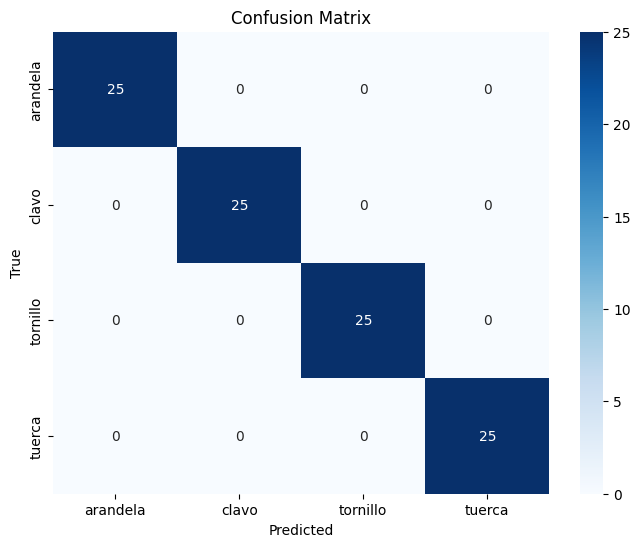

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define variables to store predictions and true labels for confusion matrix
y_true = []  # True labels
y_pred = []  # Predicted labels

# Loop over all test samples and store results
for i in range(len(X)):
    prediction, _ = knn(X, y, X[i], k=5, category_mapping=category_mapping)
    y_true.append(category_mapping[y[i]])  # Store the true class name (category_mapping maps label to class)
    y_pred.append(prediction)  # Store the predicted class name

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(category_mapping.values()))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=category_mapping.values(), yticklabels=category_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [121]:
scaled_df

Hu_Moment_1  Hu_Moment_2  Hu_Moment_3  Hu_Moment_4  Hu_Moment_5  \
0     -0.836830    -0.685661    -0.625925    -0.614067    -0.449914   
1     -0.880495    -0.685662    -0.626341    -0.614124    -0.449914   
2     -0.807596    -0.685337    -0.623898    -0.613993    -0.449914   
3      0.648093     0.328351    -0.623735    -0.613521    -0.449913   
4      0.984200     0.717096    -0.160928     0.020256    -0.335566   
..          ...          ...          ...          ...          ...   
95    -0.876934    -0.685661    -0.626339    -0.614089    -0.449914   
96    -0.811640    -0.685601    -0.625960    -0.613724    -0.449913   
97    -0.847587    -0.685442    -0.626148    -0.614054    -0.449914   
98    -0.836658    -0.685417    -0.625160    -0.614097    -0.449914   
99    -0.889280    -0.685660    -0.626345    -0.614084    -0.449914   

    Hu_Moment_6  circle_area_ratio  axis_aspect_ratio  eccentricity  \
0     -0.524943           0.835638           0.872879     -0.733401   
1     -0.524943           1.166384           0.979978     -1.238980   
2     -0.524945           0.802404           0.896014     -0.808830   
3     -0.524524          -1.176488          -1.301152      1.135481   
4      0.000277          -1.179489          -1.627348      1.189768   
..          ...                ...                ...           ...   
95    -0.524943           1.158721           0.976843     -1.210366   
96    -0.524941           0.862062           0.950156     -1.035279   
97    -0.524944           0.842504           0.852366     -0.672768   
98    -0.524943           0.802871           0.925132     -0.918812   
99    -0.524943           1.130675           0.960262     -1.092227   

    perimeter_area_ratio  label_categorical  
0               0.144427                  3  
1              -0.490535                  0  
2               0.438798                  3  
3               1.354646                  1  
4               1.751826                  1  
..                   ...                ...  
95             -0.816035                  0  
96              0.366187                  3  
97             -0.725285                  3  
98             -0.301386                  3  
99             -0.713697                  0  

[100 rows x 11 columns]

# Save the final dataframe

In [ ]:
scaled_df['label_categorical'] = scaled_df['label_categorical'].astype(int)
scaled_df.drop(columns=['label_categorical'], inplace=True)
scaled_df.to_csv('train_features.csv', index=False)